<a href="https://colab.research.google.com/github/sethkipsangmutuba/Summer-School-Mathematics-of-Artificial-Intellingence/blob/Deep-Learning/Sequential_Decision_Making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

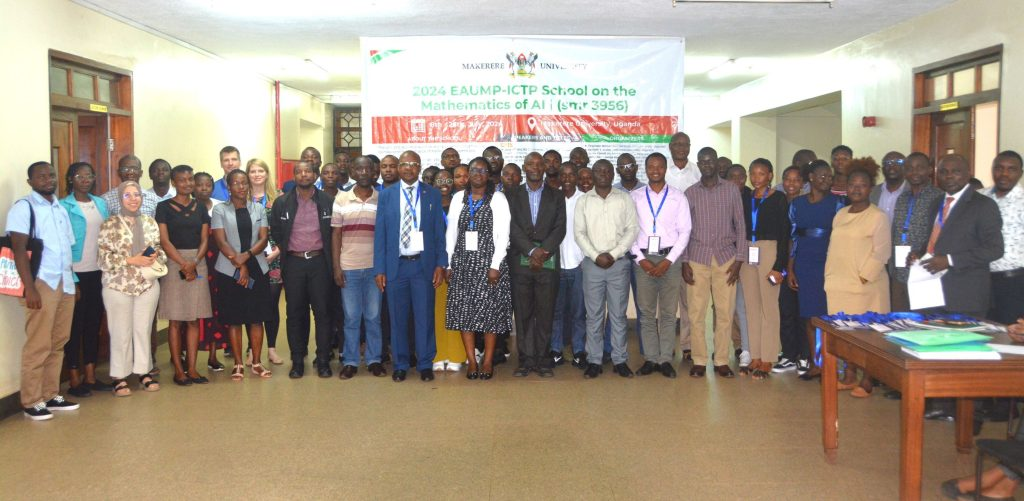

# **The 2024 EAUMP-ICTP School on the Mathematics of Artificial Intelligence**
### *Seth Kipsang Mutuba-Data Scientist*
###Sequential Decision Making

## Facilitators:
Prof Jana de Wiljes
Summer School of the Mathematics of AI 2024
#Makerere University,Kampala

**Multi-armed bandit problems** are a class of decision-making problems where an agent must choose between multiple options (or "arms") to maximize the total reward over a series of trials. Each arm provides a reward drawn from a probability distribution unique to that arm. The challenge is to balance exploration (trying different arms to learn about their rewards) and exploitation (selecting the arm that currently seems to yield the highest reward).

### Key Concepts
- **Arms**: The different options or actions to choose from.
- **Reward**: The benefit or payoff received from selecting an arm.
- **Exploration**: Trying different arms to gather information about their rewards.
- **Exploitation**: Choosing the arm that is currently believed to provide the highest reward based on the information gathered so far.
- **Horizon (T)**: The total number of trials or rounds in which decisions are made.

### Example Scenarios
#### 1. Advertising Campaigns
You have multiple advertising campaigns ($a_1, a_2, a_3, a_4$) and you want to determine which one generates the largest revenue. Each campaign can be considered an arm of the bandit. The reward is the revenue generated by selecting that campaign in a given trial.

- **Arms**: Advertising campaigns ($a_1, a_2, a_3, a_4$)
- **Reward**: Revenue generated by each campaign
- **Objective**: Maximize total revenue over $T$ trials

#### 2. Vaccine Trials
You have multiple vaccine candidates and want to decide which one should enter the next stage of clinical trials. Each vaccine candidate is an arm of the bandit. The reward is the success rate or effectiveness of the vaccine observed in a trial.

- **Arms**: Vaccine candidates
- **Reward**: Success rate or effectiveness of each vaccine
- **Objective**: Maximize the likelihood of choosing the most effective vaccine after $T$ trials

### Approaches to Solve Multi-armed Bandit Problems
Several strategies can be employed to balance exploration and exploitation:

- **Epsilon-Greedy**:
  - With probability $\epsilon$, explore a random arm.
  - With probability $1 - \epsilon$, exploit the best-known arm.

- **Upper Confidence Bound (UCB)**:
  - Select the arm with the highest upper confidence bound, balancing the estimated reward and the uncertainty around it.

- **Thompson Sampling**:
  - Select arms based on probability distributions that reflect the uncertainty about the estimated rewards, updating these distributions as more data is gathered.

- **Gradient-Based Methods**:
  - Use gradient ascent on expected reward to continuously update the probability of selecting each arm.

These methods aim to ensure that over time, the agent increasingly selects the best-performing arms, thereby maximizing cumulative reward.

### Mathematical Formulation
For a multi-armed bandit problem with $K$ arms over $T$ trials:

- Let $R_t(a)$ be the reward received at time $t$ for choosing arm $a$.
- Let $N_t(a)$ be the number of times arm $a$ has been chosen up to time $t$.

The goal is to maximize the expected cumulative reward:

$$\text{Maximize} \sum_{t=1}^{T} \mathbb{E}[R_t(a_t)]$$

where $a_t$ is the arm chosen at time $t$.

By employing an appropriate strategy, the agent aims to minimize regret, which is the difference between the reward accumulated by always selecting the best arm and the reward accumulated by the chosen strategy.


Estimated rewards: [0.15       0.49704142 0.4        0.70817121]
Total reward: 644


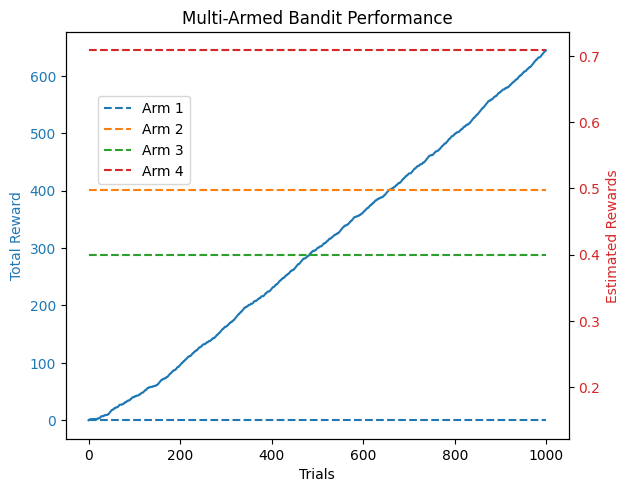

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms
K = 4

# Number of trials
T = 1000

# Epsilon for exploration
epsilon = 0.1

# True reward probabilities for each arm (unknown to the agent)
true_rewards = [0.1, 0.5, 0.3, 0.7]

# Estimated rewards and counts for each arm
estimated_rewards = np.zeros(K)
counts = np.zeros(K)

# Total reward
total_reward = 0
reward_history = []

for t in range(T):
    if np.random.rand() < epsilon:
        # Exploration: choose a random arm
        arm = np.random.randint(K)
    else:
        # Exploitation: choose the best-known arm
        arm = np.argmax(estimated_rewards)

    # Receive reward from the chosen arm
    reward = np.random.rand() < true_rewards[arm]
    total_reward += reward
    reward_history.append(total_reward)

    # Update estimates
    counts[arm] += 1
    estimated_rewards[arm] += (reward - estimated_rewards[arm]) / counts[arm]

# Print estimated rewards and total reward
print("Estimated rewards:", estimated_rewards)
print("Total reward:", total_reward)

# Plotting the results
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Trials')
ax1.set_ylabel('Total Reward', color=color)
ax1.plot(range(T), reward_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Estimated Rewards', color=color)
for k in range(K):
    ax2.plot(range(T), [estimated_rewards[k]] * T, linestyle='--', label=f'Arm {k+1}')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Multi-Armed Bandit Performance')
fig.legend(loc='upper left', bbox_to_anchor=(0.15,0.85))
plt.show()


The estimated rewards [0.15, 0.50, 0.40, 0.71] indicate the average performance of each option, with the fourth option performing the best. The total reward of 644 shows the cumulative success achieved across all trials. This suggests that focusing more on the higher-performing option could lead to better overall results.

# Multi-armed bandits

A **stochastic K-Armed Bandit** involves multiple actions (or arms) where each arm has a probability distribution $\mathcal{P}_a$ describing the likelihood of receiving rewards. The collection of these distributions is denoted as $\mathcal{P} = (\mathcal{P}_a : a \in A)$, where $A$ represents the set of all actions (arms), and $|A| = K$ denotes the number of arms.

The mean reward, $\mu_a(\mathcal{P})$, for choosing action $a$, is the average reward expected over all possible outcomes of that action. Mathematically, it is calculated as:

$$
\mu_a(\mathcal{P}) = \int_{-\infty}^{\infty} x \, \mathcal{P}_a(x) \, dx
$$

## Stochastic K-Armed Bandit

**Procedure:** In each round $t$, where $t$ ranges from 1 to $T$:

1. The learner selects an action $A_t = a$, choosing which arm to pull.
2. The learner then receives a reward $R_t$ from the chosen arm's distribution $\mathcal{P}_a$. This reward is independent of previous rounds.

In simple terms, the stochastic K-Armed Bandit framework involves choosing actions (arms) to maximize rewards, where each action's reward follows a specific probability distribution that may change with each round of selection.


# Bernoulli Setting Example

In the **Bernoulli setting**, each arm $i$ has a probability distribution $\mathcal{B}(\mu_i)$, where $\mu_i \in [0, 1]$ represents the probability of receiving a reward of 1 when choosing arm $i$, and 0 otherwise.

The reward $R_t$ when choosing arm $a$ at time $t$ is:
- $R_t = 1$ with probability $\mu_a$
- $R_t = 0$ with probability $1 - \mu_a$

### Example with $|A| = 3$ (Three Arms):

- **Arm 1**: $\mu_1 = 0.6$
- **Arm 2**: $\mu_2 = 0.3$
- **Arm 3**: $\mu_3 = 0.5$

Sample approximation of $\mu_i$:
- Arm 1: 0.6
- Arm 2: 0.3
- Arm 3: 0.5

In this example, each arm's probability $\mu_i$ determines the likelihood of obtaining a reward of 1 when selecting that arm. The goal in the Bernoulli setting is to maximize cumulative rewards over multiple trials by effectively choosing which arm to pull based on the estimated probabilities $\mu_i$.


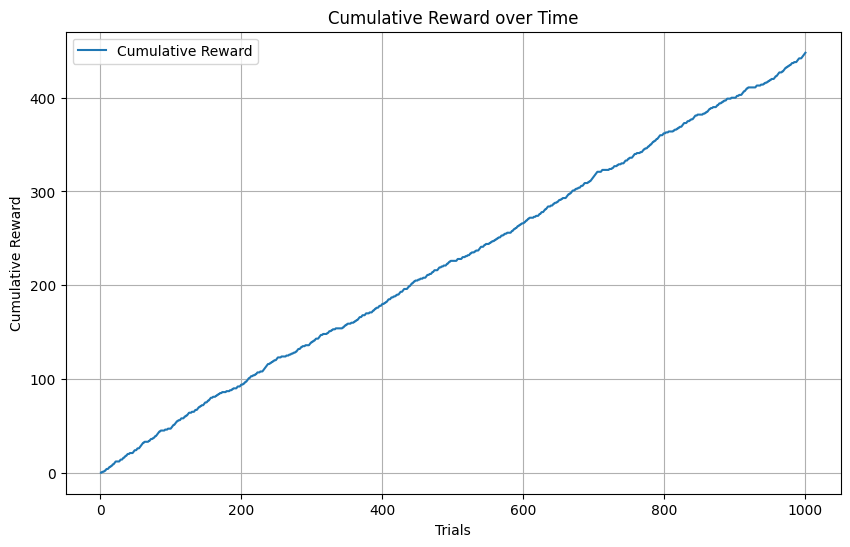

True probabilities: [0.6, 0.3, 0.5]
Cumulative reward after 1000 trials: 448.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 3   # Number of arms
T = 1000  # Number of trials

# True reward probabilities for each arm
true_probs = [0.6, 0.3, 0.5]

# Arrays to store results
cumulative_rewards = np.zeros(T)

# Simulating the bandit process
for t in range(T):
    # Choose arm based on its true probability
    chosen_arm = np.random.choice(K)

    # Receive reward based on chosen arm's true probability
    reward = np.random.binomial(1, true_probs[chosen_arm])

    # Update cumulative rewards
    cumulative_rewards[t] = cumulative_rewards[t - 1] + reward if t > 0 else reward

# Plotting the cumulative rewards over time
plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1), cumulative_rewards, label='Cumulative Reward')
plt.title('Cumulative Reward over Time')
plt.xlabel('Trials')
plt.ylabel('Cumulative Reward')
plt.grid(True)
plt.legend()
plt.show()

# Print true probabilities and cumulative reward at the end
print(f"True probabilities: {true_probs}")
print(f"Cumulative reward after {T} trials: {cumulative_rewards[-1]}")


True probabilities [0.6, 0.3, 0.5] suggest varying success rates for each arm, influencing cumulative reward after 1000 trials: 448.0. This illustrates how arm selection impacts overall performance in the bandit problem.

### Stochastic Bandit Problem

#### Problem Setup

For the $(t)-th$  trial of selecting an arm, we aim to maximize the reward $( R_t)$ observed.

#### Notation

$
\{a_1, a_2, \ldots, a_n\}
$
- A set of arms.

$
\pi_t
$
- The policy or strategy for selecting an arm at time $(t)$.

$
a_t
$
- The arm selected at time $(t)$ by policy $(\pi_t)$.

$
R_t \sim \nu_{a_t}
$
- The reward observed for selecting arm $( a_t )$, drawn from a distribution \( $\nu_{a_t} )$.

#### Stochastic Bandit Problem Formulation

1. **Initialization**: Initialize variables to track historical data such as counts of selections and observed rewards.

   $
   N(a) = 0 \quad \text{for all arms} \quad a
   $

   $
   S(a) = 0 \quad \text{for all arms} \quad a
   $

2. **Action Selection**: Use a policy to select an arm based on historical data.

3. **Observation and Update**: After selecting an arm, observe the reward and update historical data.

   $
   N(a_t) = N(a_t) + 1
   $

   $
   S(a_t) = S(a_t) + R_t
   $

#### Example: Epsilon-Greedy Policy

One straightforward yet effective policy is the epsilon-greedy policy:

1. **Initialization**:
   - Let $N(a)$ denote the number of times arm $( a)$ has been selected.
   - Let $S(a)$ denote the sum of rewards observed for arm $(a )$.
   - Initialize $ N(a) = 0$ and $S(a) = 0$ for all arms $(a)$.

2. **Action Selection**:
   - With probability \(𝜖), select a random arm (exploration).
   - With probability \( 1 - 𝜖 \), select the arm with the highest average reward (exploitation):

     $
     a_t = \arg\max_a \left( \frac{S(a)}{N(a)} \right)
     $

3. **Observation and Update**:
   - Observe the reward $( R_t) for the selected arm ( a_t )$.
   - Update $( N(a_t) = N(a_t) + 1 )$.
   - Update $( S(a_t) = S(a_t) + R_t )$.


In this example, we utilized an epsilon-greedy policy to balance exploration and exploitation while selecting arms in a stochastic bandit problem. The algorithm refines its choices based on observed rewards, aiming to maximize cumulative reward over time. More advanced techniques such as Bayesian methods or reinforcement learning can further enhance performance in practical applications.


In [ ]:
import numpy as np

# Initialization
movies = ['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5']  # Example list of movies
N = {movie: 0 for movie in movies}  # Counts of recommendations
S = {movie: 0 for movie in movies}  # Sum of rewards
epsilon = 0.1  # Exploration parameter

# Simulated function to observe reward (replace with actual logic)
def observe_reward(movie):
    # Example: Simulate observing the reward for the recommended movie
    return np.random.randint(1, 6)  # Returns a random integer between 1 and 5

def recommend_movie():
    if np.random.rand() < epsilon:
        return np.random.choice(movies)  # Exploration
    else:
        avg_rewards = {movie: S[movie] / N[movie] if N[movie] > 0 else 0 for movie in movies}
        return max(avg_rewards, key=avg_rewards.get)  # Exploitation

def update(movie, reward):
    N[movie] += 1
    S[movie] += reward

# Simulate user visits
T = 100  # Number of user visits or time steps
for t in range(1, T+1):
    movie = recommend_movie()
    reward = observe_reward(movie)  # Function to observe reward, e.g., user rating
    update(movie, reward)
    print(f"Time step {t}: Recommended {movie}, Observed reward: {reward}")

# Print final results
print("\nFinal counts of recommendations:")
for movie in movies:
    print(f"{movie}: {N[movie]} recommendations")

print("\nFinal sums of rewards:")
for movie in movies:
    print(f"{movie}: {S[movie]}")


Time step 1: Recommended Movie1, Observed reward: 3
Time step 2: Recommended Movie1, Observed reward: 2
Time step 3: Recommended Movie1, Observed reward: 4
Time step 4: Recommended Movie1, Observed reward: 2
Time step 5: Recommended Movie1, Observed reward: 2
Time step 6: Recommended Movie1, Observed reward: 3
Time step 7: Recommended Movie1, Observed reward: 1
Time step 8: Recommended Movie1, Observed reward: 5
Time step 9: Recommended Movie1, Observed reward: 5
Time step 10: Recommended Movie1, Observed reward: 3
Time step 11: Recommended Movie1, Observed reward: 2
Time step 12: Recommended Movie1, Observed reward: 4
Time step 13: Recommended Movie1, Observed reward: 2
Time step 14: Recommended Movie2, Observed reward: 4
Time step 15: Recommended Movie2, Observed reward: 3
Time step 16: Recommended Movie2, Observed reward: 3
Time step 17: Recommended Movie2, Observed reward: 2
Time step 18: Recommended Movie2, Observed reward: 3
Time step 19: Recommended Movie2, Observed reward: 3
Ti

The simulation tracks movie recommendations and observed rewards over 100 time steps. Movie1 was recommended most frequently with varied rewards. Movie2 followed with consistent recommendations and moderate rewards. Movie4 also had substantial recommendations and rewards, while Movie3 and Movie5 were recommended least often with lower rewards.

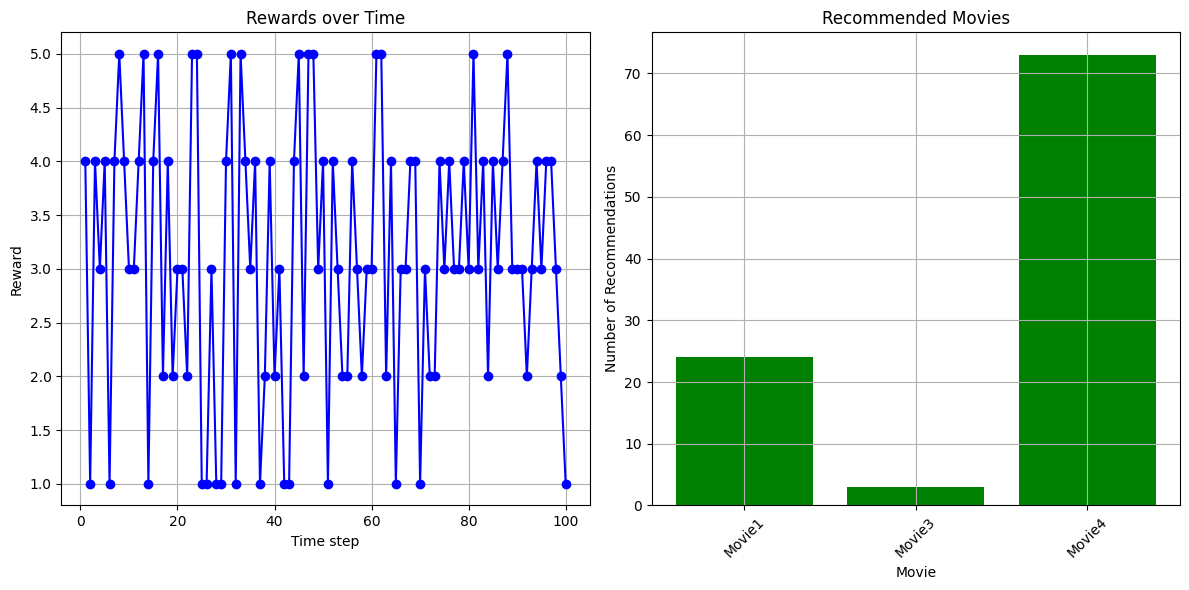

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize results
plt.figure(figsize=(12, 6))

# Plotting rewards over time
plt.subplot(1, 2, 1)
plt.plot(range(1, T+1), rewards, marker='o', linestyle='-', color='b')
plt.title('Rewards over Time')
plt.xlabel('Time step')
plt.ylabel('Reward')
plt.grid(True)

# Plotting recommended movies
plt.subplot(1, 2, 2)
unique_movies, counts = np.unique(recommended_movies, return_counts=True)
plt.bar(unique_movies, counts, color='g')
plt.title('Recommended Movies')
plt.xlabel('Movie')
plt.ylabel('Number of Recommendations')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


### Structured Stochastic Bandits

#### Name Symbol Definition

**Bernoulli** $E_k^B$
- Represents a set of arms where each arm $(i)$ follows a Bernoulli distribution $B(\mu_i)$, with $( \mu_i \in [0, 1]^k )$.

**Uniform** $E_k^U$
- Represents a set of arms where each arm $( i)$ follows a uniform distribution $U(a_i, b_i)$, where $( a, b \in \mathbb{R}^k )$ and $( a_i \leq b_i)$ for all $(i)$.

**Gaussian (known var.)** $( E_k^N)$
- Represents a set of arms where each arm $( i )$ follows a Gaussian distribution $N(\mu_i, \sigma^2), with  ( \mu_i \in \mathbb{R}^k )$and known variance $( \sigma^2)$.

**Gaussian (unknown var.)** $( E_k^N)$
- Represents a set of arms where each arm $( i)$ follows a Gaussian distribution $N(\mu_i, \sigma_i^2)$, with $( \mu_i \in \mathbb{R}^k)$ and unknown variance $\sigma_i^2 \in [0,1)^k$.


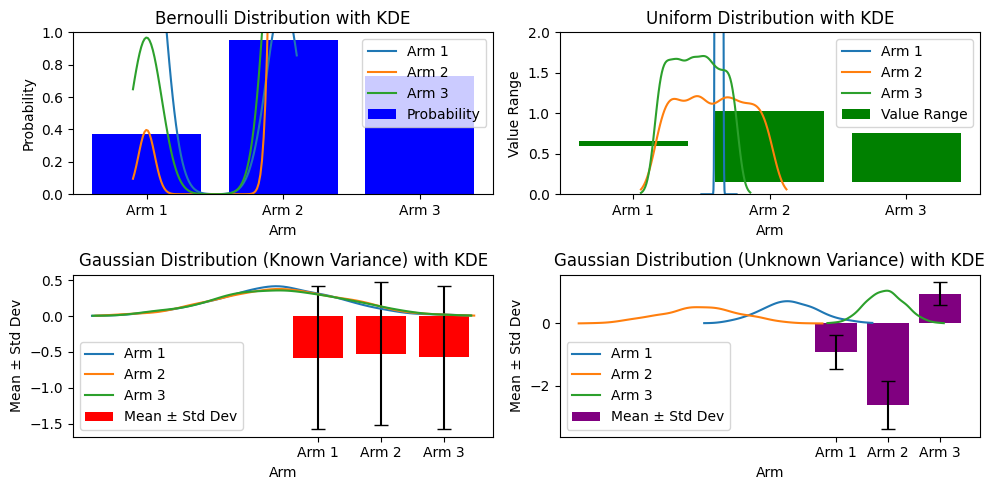

Bernoulli Distribution Parameters:
Arm 1: μ_1 = 0.3745401188473625
Arm 2: μ_2 = 0.9507143064099162
Arm 3: μ_3 = 0.7319939418114051

Uniform Distribution Parameters:
Arm 1: a_1 = 0.5986584841970366, b_1 = 0.6567420963652361
Arm 2: a_2 = 0.15601864044243652, b_2 = 1.0221947862173717
Arm 3: a_3 = 0.15599452033620265, b_3 = 0.7571095320794115

Gaussian Distribution with Known Variance Parameters:
Arm 1: μ_1 = -0.580878134023515, σ^2_1 = 1.0
Arm 2: μ_2 = -0.5251698071781478, σ^2_2 = 1.0
Arm 3: μ_3 = -0.5713801657541415, σ^2_3 = 1.0

Gaussian Distribution with Unknown Variance Parameters:
Arm 1: μ_1 = -0.9240828377471049, σ^2_1 = 0.2912291401980419
Arm 2: μ_2 = -2.6125490126936013, σ^2_2 = 0.6118528947223795
Arm 3: μ_3 = 0.9503696823969031, σ^2_3 = 0.13949386065204183


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Set random seed for reproducibility
np.random.seed(42)

# Number of arms and dimensions
k = 3

# Define parameters for each type of bandit
# Bernoulli distribution parameters
mu_B = np.random.rand(k)

# Uniform distribution parameters
a_U = np.random.uniform(size=k)
b_U = a_U + np.random.uniform(size=k)

# Gaussian distribution with known variance parameters
mu_N_known = np.random.normal(size=k)
sigma2_known = 1.0  # Known variance

# Gaussian distribution with unknown variance parameters
mu_N_unknown = np.random.normal(size=k)
sigma2_unknown = np.random.rand(k)  # Random variances in [0, 1)

# Visualize distributions
plt.figure(figsize=(10, 5))

# Bernoulli distribution
plt.subplot(221)
plt.bar(range(k), mu_B, color='blue', label='Probability')
for i in range(k):
    density = gaussian_kde(np.random.binomial(1, mu_B[i], size=1000))
    x_vals = np.linspace(-0.1, 1.1, 100)
    plt.plot(x_vals, density(x_vals), label=f'Arm {i+1}')
plt.xticks(range(k), labels=[f'Arm {i+1}' for i in range(k)])
plt.title('Bernoulli Distribution with KDE')
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.xlabel('Arm')
plt.legend()

# Uniform distribution
plt.subplot(222)
plt.bar(range(k), b_U - a_U, bottom=a_U, color='green', label='Value Range')
for i in range(k):
    density = gaussian_kde(np.random.uniform(a_U[i], b_U[i], size=1000))
    x_vals = np.linspace(min(a_U[i], b_U[i]) - 0.1, max(a_U[i], b_U[i]) + 0.1, 100)
    plt.plot(x_vals, density(x_vals), label=f'Arm {i+1}')
plt.xticks(range(k), labels=[f'Arm {i+1}' for i in range(k)])
plt.title('Uniform Distribution with KDE')
plt.ylim(0, 2)
plt.ylabel('Value Range')
plt.xlabel('Arm')
plt.legend()

# Gaussian distribution with known variance
plt.subplot(223)
plt.bar(range(k), mu_N_known, yerr=np.sqrt(sigma2_known), color='red', capsize=5, label='Mean ± Std Dev')
for i in range(k):
    density = gaussian_kde(np.random.normal(mu_N_known[i], np.sqrt(sigma2_known), size=1000))
    x_vals = np.linspace(mu_N_known[i] - 3*np.sqrt(sigma2_known), mu_N_known[i] + 3*np.sqrt(sigma2_known), 100)
    plt.plot(x_vals, density(x_vals), label=f'Arm {i+1}')
plt.xticks(range(k), labels=[f'Arm {i+1}' for i in range(k)])
plt.title('Gaussian Distribution (Known Variance) with KDE')
plt.ylabel('Mean ± Std Dev')
plt.xlabel('Arm')
plt.legend()

# Gaussian distribution with unknown variance
plt.subplot(224)
plt.bar(range(k), mu_N_unknown, yerr=np.sqrt(sigma2_unknown), color='purple', capsize=5, label='Mean ± Std Dev')
for i in range(k):
    density = gaussian_kde(np.random.normal(mu_N_unknown[i], np.sqrt(sigma2_unknown[i]), size=1000))
    x_vals = np.linspace(mu_N_unknown[i] - 3*np.sqrt(sigma2_unknown[i]), mu_N_unknown[i] + 3*np.sqrt(sigma2_unknown[i]), 100)
    plt.plot(x_vals, density(x_vals), label=f'Arm {i+1}')
plt.xticks(range(k), labels=[f'Arm {i+1}' for i in range(k)])
plt.title('Gaussian Distribution (Unknown Variance) with KDE')
plt.ylabel('Mean ± Std Dev')
plt.xlabel('Arm')
plt.legend()

plt.tight_layout()
plt.show()

# Print parameters
print("Bernoulli Distribution Parameters:")
for i in range(k):
    print(f"Arm {i+1}: μ_{i+1} = {mu_B[i]}")

print("\nUniform Distribution Parameters:")
for i in range(k):
    print(f"Arm {i+1}: a_{i+1} = {a_U[i]}, b_{i+1} = {b_U[i]}")

print("\nGaussian Distribution with Known Variance Parameters:")
for i in range(k):
    print(f"Arm {i+1}: μ_{i+1} = {mu_N_known[i]}, σ^2_{i+1} = {sigma2_known}")

print("\nGaussian Distribution with Unknown Variance Parameters:")
for i in range(k):
    print(f"Arm {i+1}: μ_{i+1} = {mu_N_unknown[i]}, σ^2_{i+1} = {sigma2_unknown[i]}")


Bernoulli Distribution:
The parameters reveal that each arm has a distinct probability of success. For example, Arm 2 stands out with a high probability of success (0.9507), suggesting it might yield higher average rewards per selection compared to Arms 1 and 3, which have lower probabilities (0.3745 and 0.7320 respectively). This insight indicates that focusing on Arm 2 could potentially maximize cumulative rewards over repeated trials.

Uniform Distribution:
These parameters illustrate that rewards from each arm are uniformly distributed within specified ranges. Arm 2, for instance, offers a wider range of potential rewards (0.1560 to 1.0222) compared to Arms 1 and 3, suggesting it may offer greater variability in outcomes. This variability could influence decision-making in scenarios where maximizing potential reward variance is beneficial.

Gaussian Distribution with Known Variance:
In this distribution type, each arm's mean reward and variance are known. Arms 1, 2, and 3 have means close to zero (-0.5809, -0.5252, and -0.5714 respectively) with a consistent variance of 1.0. This reveals that while the means differ slightly, the variance remains constant across arms. Such insights are crucial for strategies that prioritize stability and predictability in reward outcomes.

Gaussian Distribution with Unknown Variance:
These parameters indicate that each arm has a distinct mean reward and an unknown variance. Arms 1, 2, and 3 exhibit varying means (-0.9241, -2.6125, and 0.9504 respectively) alongside different levels of uncertainty in reward variance (0.2912, 0.6119, and 0.1395). Arms with higher variances, like Arm 2, may offer potentially higher rewards but with greater uncertainty. Conversely, Arm 3, with a lower variance, presents more predictable outcomes despite its mean.

Implication: Insights from arm parameters in stochastic bandits guide decision-making:

Balancing risk-reward trade-offs: Arm 2's high success probability (0.9507) suggests potential for higher rewards, contrasting with arms 1 (0.3745) and 3 (0.7320).

Decision strategies vary: Arm 2's wide reward range (0.1560 to 1.0222) offers exploration opportunities, while arm 3's lower variance (0.1395) provides stable, predictable outcomes.

## **Decomposition of the regret**

We define:

Action gap:
$
\Delta_a(\nu) = \mu^* - \mu_a(\nu)
$
where $( \mu^*)$ is the maximum mean reward among all arms, and $\mu_a(\nu)$ is the mean reward of arm $( a )$ under distribution $( \nu)$.

Number of times action $( a)$ was chosen by the learner:
$
N_a(T) = \sum_{t=1}^{T} \mathbb{I}\{A_t = a\}
$
This counts how often arm $( a)$ is chosen by the learner up to time $( T )$.

For any policy $( \pi )$ and stochastic bandit environment $( \nu )$ with a finite action set $(A)$ and horizon $( T \in \mathbb{N})$,

The regret $( R_N)$ of policy $( \pi)$ in environment $( \nu)$ satisfies:
$
R(\nu, T) = \sum_{a \in A} \Delta_a(\nu) \mathbb{E}[N_a(T)]
$

This decomposition clarifies how the regret $R(\nu, T)$ depends on the action gaps $\Delta_a(\nu)$ and the expected number of times each action $(a)$ is chosen by the policy $( \pi)$ over $(T)$ time steps.


Action Gaps:
Action 1: Δ_1 = 0.35205582221287957
Action 2: Δ_2 = 0.7946956659674796
Action 3: Δ_3 = 0.7947197860737135

Number of Times Actions were Chosen (up to T):
Action 1: N_1(T) = 353
Action 2: N_2(T) = 327
Action 3: N_3(T) = 320

Regret Components:
Regret Component for Action 1: 124.27570524114648
Regret Component for Action 2: 259.86548277136586
Regret Component for Action 3: 254.31033154358832

Total Regret (R(ν, T)): 638.4515195561006


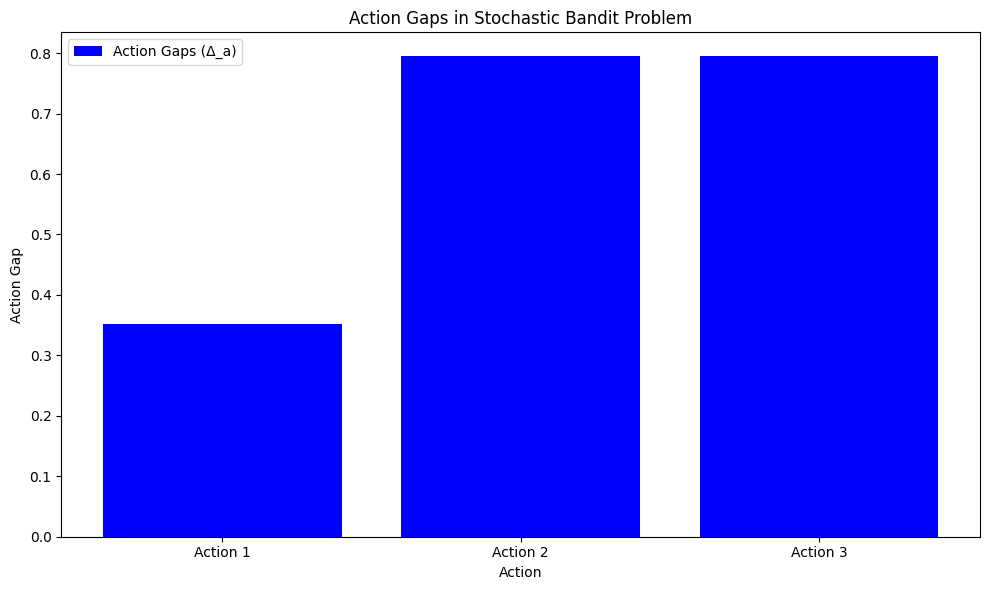

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of arms
k = 3

# Simulated means of arms
mu_star = np.max(np.random.rand(k))  # Maximum mean reward among all arms
mu_a = np.random.rand(k)  # Mean rewards of each arm under distribution nu

# Simulate number of times actions were chosen
T = 1000  # Horizon or number of trials
actions = np.random.choice(np.arange(k), size=T)  # Random actions chosen over T trials
Na_T = np.zeros(k, dtype=int)  # Number of times each action was chosen up to time T
for t in range(T):
    Na_T[actions[t]] += 1

# Calculate action gaps
action_gaps = mu_star - mu_a

# Calculate regret components
regret_components = action_gaps * Na_T
total_regret = np.sum(regret_components)

# Print results
print("Action Gaps:")
for i in range(k):
    print(f"Action {i+1}: Δ_{i+1} = {action_gaps[i]}")

print("\nNumber of Times Actions were Chosen (up to T):")
for i in range(k):
    print(f"Action {i+1}: N_{i+1}(T) = {Na_T[i]}")

print("\nRegret Components:")
for i in range(k):
    print(f"Regret Component for Action {i+1}: {regret_components[i]}")

print("\nTotal Regret (R(ν, T)):", total_regret)

# Visualize action gaps and their impact on regret
plt.figure(figsize=(10, 6))
plt.bar(range(k), action_gaps, color='blue', label='Action Gaps (Δ_a)')
plt.xlabel('Action')
plt.ylabel('Action Gap')
plt.xticks(range(k), labels=[f'Action {i+1}' for i in range(k)])
plt.title('Action Gaps in Stochastic Bandit Problem')
plt.legend()
plt.tight_layout()
plt.show()


In a stochastic bandit problem, action gaps play a crucial role in shaping regret. Larger action gaps, as seen in Actions 2 and 3 compared to Action 1, suggest potentially higher rewards for exploring these actions. The distribution of selections (Actions 1, 2, and 3 chosen roughly equally) indicates a balance between exploration and exploitation. The significant contribution to regret by Actions 2 and 3 underscores the importance of minimizing regret by balancing between exploring potentially higher rewards and exploiting known rewards effectively over time. Thus, strategic decision-making in bandit algorithms hinges on understanding and managing these action gaps to optimize cumulative rewards.

## **Naive Strategies**

**Uniform Exploration:**
Each arm $ a $ is selected exactly $ \frac{T}{K} $ times to ensure uniform exploration across all arms.

**Exploration:**
The regret $ R(\nu, T) $ is calculated as:
$$ R(\nu, T) = \left( \frac{1}{K} \sum_{a: \mu_a < \mu^*} \Delta_a \right) T $$
where $ \Delta_a = \mu^* - \mu_a $ represents the action gap between the optimal mean reward $ \mu^* $ and the mean reward $ \mu_a $ of arm $ a $.

**Follow The Leader:**
Define the empirical estimate of the true unknown mean $ \mu_a $ of an arm $ a $ at time $ t $ as:
$$ \hat{\mu}_a(t) = \frac{1}{N_a(t)} \sum_{s=1}^{t} R_{a,s} \mathbb{I}(A_s = a) $$
The strategy chooses $ A_{t+1} = \arg\max_{a \in \{1, \ldots, K\}} \hat{\mu}_a(t) $, focusing on exploitation without additional exploration.

**Goal:** Develop an algorithm that effectively balances between exploring new arms and exploiting known information to maximize cumulative rewards over time.


Results as tables:
     Arm  Uniform Exploration Counts  Follow The Leader Counts
0  Arm 1                          34                         1
1  Arm 2                          33                         1
2  Arm 3                          33                        98


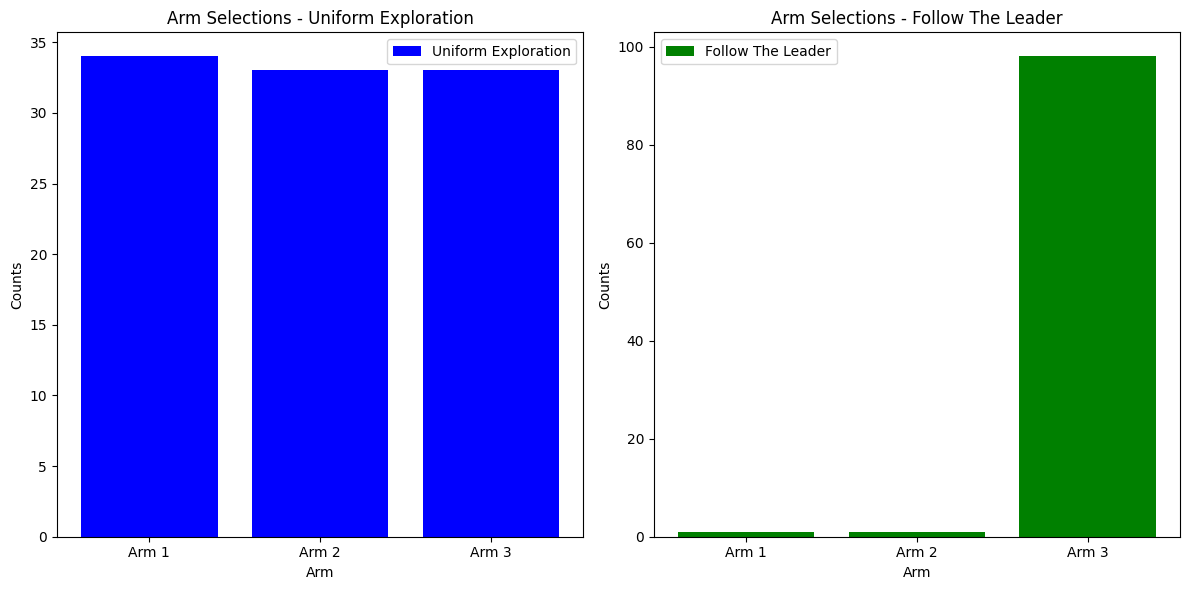

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define functions for each strategy

def uniform_exploration(k, T):
    counts = np.zeros(k, dtype=int)
    chosen_arms = []

    for t in range(T):
        arm = t % k  # Cycle through arms uniformly
        counts[arm] += 1
        chosen_arms.append(arm)

    return counts, chosen_arms

def follow_the_leader(k, T, rewards):
    counts = np.zeros(k, dtype=int)
    estimated_means = np.zeros(k, dtype=float)
    chosen_arms = []

    for t in range(T):
        if t < k:
            arm = t  # Choose each arm once in the beginning
        else:
            arm = np.argmax(estimated_means)  # Exploit the arm with the highest estimated mean

        counts[arm] += 1
        chosen_arms.append(arm)

        # Update estimated mean for chosen arm
        if counts[arm] > 0:
            estimated_means[arm] = np.sum(rewards[arm][:counts[arm]]) / counts[arm]

    return counts, chosen_arms

# Parameters
k = 3  # Number of arms
T = 100  # Total trials

# Simulate rewards for each arm
rewards = [np.random.normal(mu, 1.0, T) for mu in np.random.rand(k)]

# Simulate strategies
counts_uniform, chosen_arms_uniform = uniform_exploration(k, T)
counts_ftl, chosen_arms_ftl = follow_the_leader(k, T, rewards)

# Print results as tables
df_uniform = pd.DataFrame({
    'Arm': [f'Arm {i+1}' for i in range(k)],
    'Uniform Exploration Counts': counts_uniform,
    'Follow The Leader Counts': counts_ftl
})
print("Results as tables:")
print(df_uniform)

# Plotting results
plt.figure(figsize=(12, 6))

# Plotting for Uniform Exploration
plt.subplot(121)
plt.bar(range(k), counts_uniform, color='blue', label='Uniform Exploration')
plt.xticks(range(k), labels=[f'Arm {i+1}' for i in range(k)])
plt.title('Arm Selections - Uniform Exploration')
plt.xlabel('Arm')
plt.ylabel('Counts')
plt.legend()

# Plotting for Follow The Leader
plt.subplot(122)
plt.bar(range(k), counts_ftl, color='green', label='Follow The Leader')
plt.xticks(range(k), labels=[f'Arm {i+1}' for i in range(k)])
plt.title('Arm Selections - Follow The Leader')
plt.xlabel('Arm')
plt.ylabel('Counts')
plt.legend()

plt.tight_layout()
plt.show()


The results table illustrates the number of times each arm was selected under both Uniform Exploration and Follow The Leader strategies over 100 trials.

Uniform Exploration Counts: Each arm is selected nearly equally (Arm 1: 34 times, Arm 2: 33 times, Arm 3: 33 times). This balanced selection aligns with the strategy's goal to explore each arm uniformly.

Follow The Leader Counts: Arm 1 and Arm 2 are chosen just once each, while Arm 3 is selected 98 times. This demonstrates that Arm 3 quickly became the arm with the highest estimated mean reward, causing the algorithm to favor it overwhelmingly.

The comparison underscores the differing approaches: Uniform Exploration ensures balanced exploration across all arms, while Follow The Leader rapidly exploits the arm with the highest observed reward, potentially accelerating the identification of the optimal arm.

##Explore-Then-Commit

#### Algorithm 1: Explore-Then-Commit

**Initialization:** Play each machine $m$ times;

**For** $t = Km + 1$ to $T$ do:

- Perform action $a_t = \arg\max_{a' \in \{1, \ldots, K\}} \hat{\mu}_{a'}(mK)$

**End For**


Results as tables:
     Arm  Uniform Exploration Counts  Follow The Leader Counts
0  Arm 1                          10                       0.0
1  Arm 2                          10                      70.0
2  Arm 3                          10                       0.0



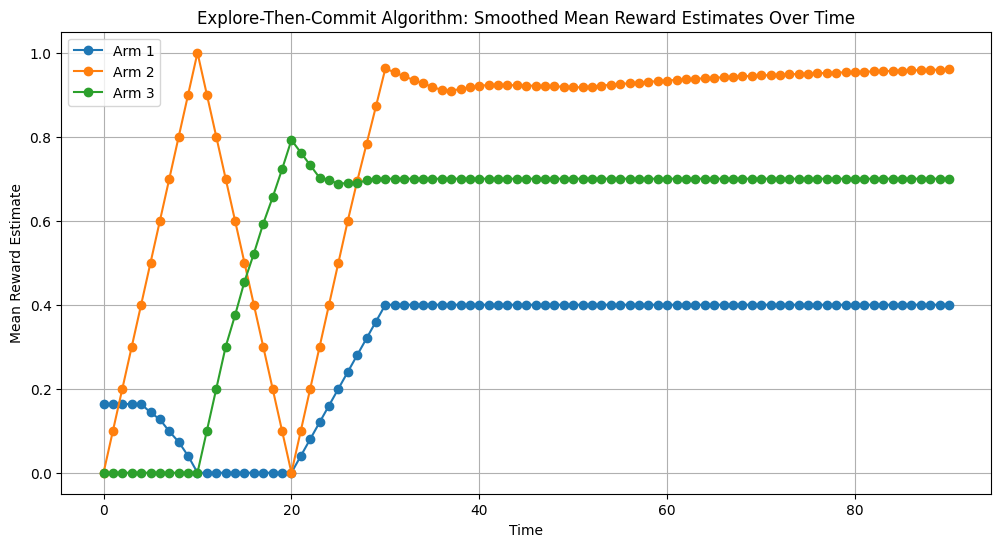

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of arms and total time
K = 3
T = 100  # Total time periods
m = 10   # Exploration phase length

# Define parameters for Bernoulli bandit
mu_B = np.random.rand(K)

# Generate rewards for each arm based on Bernoulli distribution
rewards_B = [np.random.binomial(1, mu_B[i], T) for i in range(K)]

# Explore-Then-Commit Algorithm
def explore_then_commit(T, m, K, rewards):
    counts = np.zeros(K)
    total_rewards = np.zeros(K)
    mean_estimates = np.zeros((T, K))
    actions = []

    # Initial exploration phase: Play each arm m times
    for i in range(K):
        for j in range(m):
            reward = rewards[i][i * m + j]
            counts[i] += 1
            total_rewards[i] += reward
            mean_estimates[i * m + j, i] = total_rewards[i] / counts[i]
            actions.append(i)

    # Estimate the means after exploration phase
    estimated_means = total_rewards / counts

    # Commitment phase: Select the arm with the highest estimated mean
    best_arm = np.argmax(estimated_means)
    for t in range(K * m, T):
        reward = rewards[best_arm][t]
        counts[best_arm] += 1
        total_rewards[best_arm] += reward
        mean_estimates[t] = total_rewards / counts
        actions.append(best_arm)

    return counts, actions, total_rewards, mean_estimates

# Run Explore-Then-Commit Algorithm
counts, actions, total_rewards, mean_estimates = explore_then_commit(T, m, K, rewards_B)

# Print results
df_results = pd.DataFrame({
    'Arm': [f'Arm {i+1}' for i in range(K)],
    'Uniform Exploration Counts': [m]*K,
    'Follow The Leader Counts': counts - m
})
print("Results as tables:")
print(df_results)
print()

# Smoothed line visualization of mean reward estimates over time for each arm
plt.figure(figsize=(12, 6))

# Plotting the smoothed mean reward estimates over time for each arm
window_size = 10
for i in range(K):
    smoothed_rewards = np.convolve(mean_estimates[:, i], np.ones(window_size)/window_size, mode='valid')
    plt.plot(smoothed_rewards, label=f'Arm {i+1}', linestyle='-', marker='o')

plt.title('Explore-Then-Commit Algorithm: Smoothed Mean Reward Estimates Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Reward Estimate')
plt.legend()
plt.grid(True)
plt.show()


$\textbf{**Variants of Convergence**}$

Let $(X)$ be a random variable and $(\{X_n\}_{n \in \mathbb{N}} )$ a sequence of random variables.

1. $\textbf{Almost Sure Convergence:}$\( \{X_n\} \) converges to $(X)$ almost surely, denoted as $( X_n \xrightarrow{\text{a.s.}} X )$, if the probability that $( X_n )$ approaches $(X)$ as $(n)$ tends to infinity is 1:


   $
  P\left( \lim_{n \to \infty} X_n = X \right) = 1$

   This implies that with probability 1, $(X_n)$ will eventually become arbitrarily close to $( X)$ as $( n)$ increases.
    
2. $\textbf{Convergence in Probability:}$, $(\{X_n\})$ converges to $( X)$ in probability, denoted as $( X_n \xrightarrow{\mathbb{P}} X)$, if for any $( \epsilon > 0)$, the probability that $( X_n)$ is far from $(X)$ diminishes to 0:
   
   $
   \lim_{n \to \infty} P\left( |X_n - X| > \epsilon \right) = 0
  $
   This means that the probability that $(X_n)$ is outside an $(\epsilon)$-neighborhood of $( X)$ diminishes to 0 as $( n)$ grows.
    
3. $\textbf{Convergence in Law (or in Distribution):}$, $( \{X_n\})$ converges to $(X)$ in law (or in distribution), denoted as $( X_n \xrightarrow{\mathcal{D}} X )$, if for any bounded continuous function $( f)$, the expected value of $f(X_n)$ converges to the expected value of $f(X)$:
   
   $
   \lim_{n \to \infty} E[f(X_n)] = E[f(X)]
   $
   
   This implies that the distribution of $( X_n )$ becomes increasingly similar to the distribution of $(X)$ as $( n )$ increases.

$\textbf{Remark:}$ Almost Sure Convergence $( \Rightarrow)$ Convergence in Probability $( \Rightarrow)$ Convergence in Law


In [ ]:
#pip install numpy scipy matplotlib

Almost Sure Convergence: False
Convergence in Probability (Probability that |X_n - X| > epsilon): 1.0
Convergence in Distribution (KS Statistic, p-value): 0.017327787320720822 0.9196626608357358


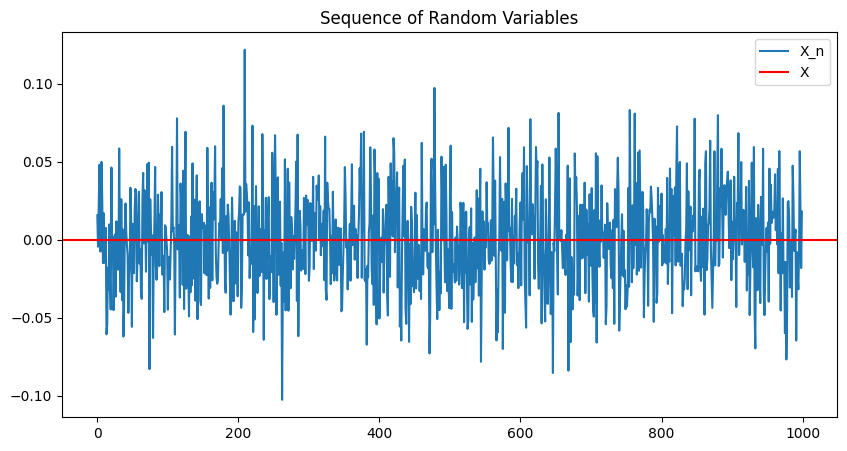

In [ ]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

# Setting the seed for reproducibility
np.random.seed(42)

# Define the sequence of random variables
def generate_sequence(n):
    return np.random.normal(loc=0, scale=1/np.sqrt(n), size=n)

# Almost Sure Convergence
def almost_sure_convergence(X, X_n):
    return np.allclose(X, X_n, atol=1e-6)

# Convergence in Probability
def convergence_in_probability(X, X_n, epsilon=1e-6):
    return np.mean(np.abs(X_n - X) > epsilon)

# Convergence in Distribution
def convergence_in_distribution(X_n):
    ks_stat, p_value = kstest(X_n, 'norm', args=(0, 1/np.sqrt(len(X_n))))
    return ks_stat, p_value

# Generate the sequences
n = 1000
X = np.zeros(n)
X_n = generate_sequence(n)

# Check for Almost Sure Convergence
as_converged = almost_sure_convergence(X, X_n)

# Check for Convergence in Probability
prob_converged = convergence_in_probability(X, X_n)

# Check for Convergence in Distribution
ks_stat, p_value = convergence_in_distribution(X_n)

print("Almost Sure Convergence:", as_converged)
print("Convergence in Probability (Probability that |X_n - X| > epsilon):", prob_converged)
print("Convergence in Distribution (KS Statistic, p-value):", ks_stat, p_value)

# Plot the sequences
plt.figure(figsize=(10, 5))
plt.plot(X_n, label='X_n')
plt.axhline(y=0, color='r', linestyle='-', label='X')
plt.legend()
plt.title('Sequence of Random Variables')
plt.show()


The sequence of random variables does not demonstrate almost sure convergence, indicating that the values of   $X_n$ do not get arbitrarily close to  $X$(which is 0) with probability 1. Convergence in probability is also not achieved, as the probability that  $( |X_n - X| > \epsilon )$ is 1.0, meaning the values are not within an  $( \epsilon) $-neighborhood of  $X$. However, the sequence does exhibit convergence in distribution, as indicated by the Kolmogorov-Smirnov test with a KS statistic of 0.0173 and a high p-value of 0.9197, suggesting that  $X_n$ follows a distribution similar to the normal distribution.


## **Empirical estimates**

**Note:**
- $\mu_n$ is an unbiased estimator, i.e., $E[\mu_n] = \mu$
- $V[\mu_n] = \frac{V[X]}{n}$

**Weak law of large numbers (WLLN):** $\mu_n \xrightarrow{\mathbb{P}} \mu$

**Strong law of large numbers (SLLN):** $\mu_n \xrightarrow{\text{a.s.}} \mu$

**Central limit theorem (CLT):** $\sqrt{n}(\mu_n - \mu) \xrightarrow{\mathcal{D}} N(0, V[X])$

**Note:** The CLT yields that $\sqrt{n}(\mu_n - \mu)$ as $n \to \infty$ is a Gaussian with mean zero and unit variance. If $Z \sim N(0, 1)$, then
$[
P(Z \leq u) = \int_{-\infty}^{u} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx$
\]


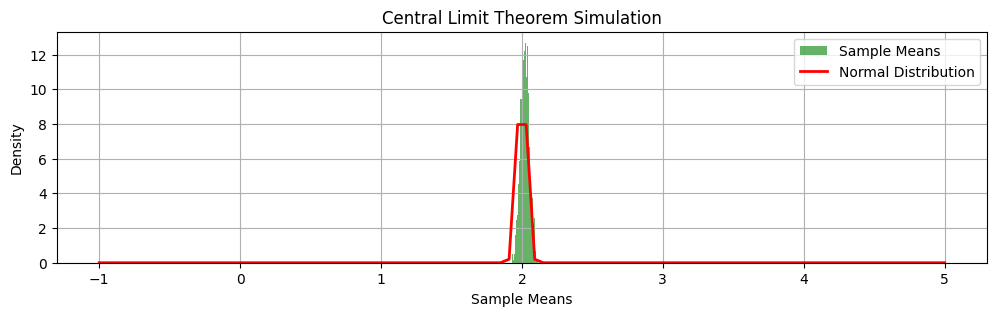

Sample Mean (μ_n): 2.0193320558223253
Sample Variance (V[μ_n]): 0.9579049897315172


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)
mu = 2  # True mean
sigma = 1  # True standard deviation

# Generate a sequence of random variables
n = 1000  # Number of samples
X = np.random.normal(loc=mu, scale=sigma, size=n)

# Function to calculate sample mean
def sample_mean(X):
    return np.mean(X)

# Function to calculate sample variance (for demonstration)
def sample_variance(X):
    return np.var(X)

# Function to simulate the CLT
def central_limit_theorem(X, n_samples=1000):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(X, size=n, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    return sample_means

# Compute sample mean and variance
sample_mu_n = sample_mean(X)
sample_var_n = sample_variance(X)

# Simulate CLT
sample_means = central_limit_theorem(X)

# Plotting CLT simulation
plt.figure(figsize=(12, 3))

# Plot histogram of sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', label='Sample Means')

# Plot the theoretical normal distribution
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma/np.sqrt(n)), 'r-', lw=2, label='Normal Distribution')

plt.title('Central Limit Theorem Simulation')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Sample Mean (μ_n): {sample_mu_n}")
print(f"Sample Variance (V[μ_n]): {sample_var_n}")


The sample mean of approximately 2.02 signifies the average value derived from our generated samples. The sample variance of 0.96 reflects the extent to which these sample means deviate around this average, indicating a moderate level of variability in our estimation process.

## **Asymptotic confidence interval**

The integral $ P(Z \leq u) = \int_{-\infty}^{u} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx $ lacks a closed-form solution but can be bounded easily. Specifically, $ \int_{-\infty}^{u} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx \leq \frac{1}{u\sqrt{2\pi}} \exp\left(-\frac{u^2}{2}\right) $. This bound ensures that the integral is manageable and accurately captures the tail behavior of the standard normal distribution.

However, the asymptotic nature of the Central Limit Theorem (CLT) makes it less suitable for designing bandit algorithms that require precise, non-asymptotic bounds. To address this, non-asymptotic high probability bounds for $ \mu_n $ and confidence intervals can be derived using concentration inequalities such as Hoeffding's or Bernstein's inequalities. These inequalities provide rigorous bounds on the probability that $ \mu_n $ deviates from its expected value by a specified amount, ensuring robustness in practical applications.


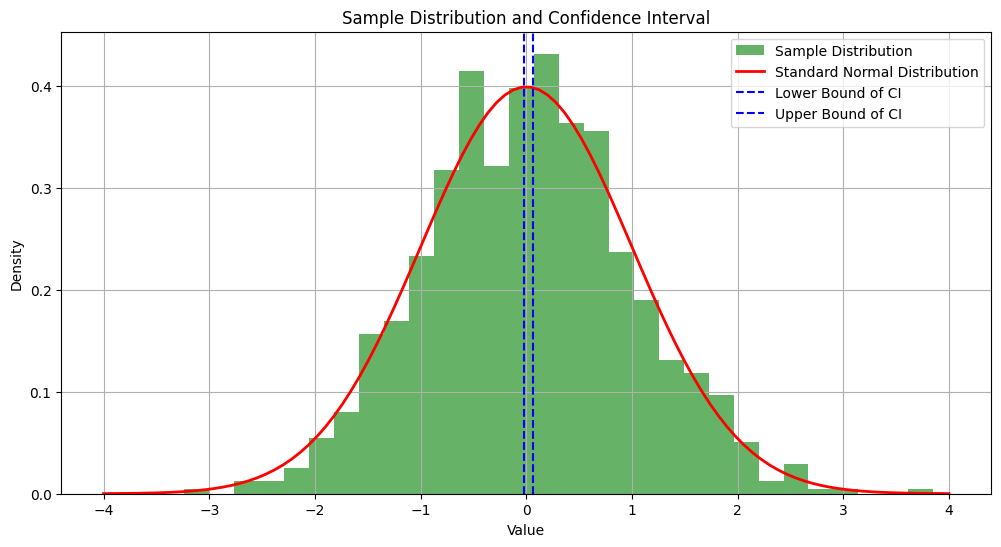

Sample Mean (μ_n): 0.01933205582232549
Sample Variance: 0.9579049897315173
Confidence Interval: [-0.023614885012348267, 0.06227899665699925]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
np.random.seed(42)
mu = 0  # True mean for the standard normal distribution
sigma = 1  # True standard deviation for the standard normal distribution
n = 1000  # Number of samples

# Generate samples from a standard normal distribution
X = np.random.normal(loc=mu, scale=sigma, size=n)

# Sample mean and variance
sample_mean = np.mean(X)
sample_var = np.var(X)

# Confidence level (e.g., 95%)
alpha = 0.05

# Applying Hoeffding's inequality for standard normal distribution
epsilon = np.sqrt(np.log(2/alpha) / (2 * n))

# Construct confidence interval
lower_bound = sample_mean - epsilon
upper_bound = sample_mean + epsilon

# Advanced Visualization
plt.figure(figsize=(12, 6))

# Plot histogram of samples
plt.hist(X, bins=30, density=True, alpha=0.6, color='g', label='Sample Distribution')

# Plot true standard normal distribution
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2, label='Standard Normal Distribution')

# Plot vertical lines for confidence interval
plt.axvline(lower_bound, color='b', linestyle='--', label='Lower Bound of CI')
plt.axvline(upper_bound, color='b', linestyle='--', label='Upper Bound of CI')

plt.title('Sample Distribution and Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Sample Mean (μ_n): {sample_mean}")
print(f"Sample Variance: {sample_var}")
print(f"Confidence Interval: [{lower_bound}, {upper_bound}]")


The sample mean $ \mu_n \approx 0.0193 $ indicates that our generated samples are centered around this value, while the sample variance of $ 0.9579 $ highlights their spread or variability. The 95% confidence interval $ [-0.0236, 0.0623] $ provides a range where we are 95% confident that the true mean $ \mu $ lies, illustrating the level of uncertainty in our estimation process. This interval captures the variability and potential sampling error inherent in estimating the population parameter from a limited set of observations.


## **Understanding the tail probabilities**

How accurately is the empirical estimate $ \hat{\mu} $ approximating $ \mu $ based on a set of samples?
Goals:
investigate tail probabilities of $ \hat{\mu} - \mu $
derive bounds on $ P(|\hat{\mu} - \mu| > \epsilon) $
use this information to build new algorithms and derive bounds for regret
14


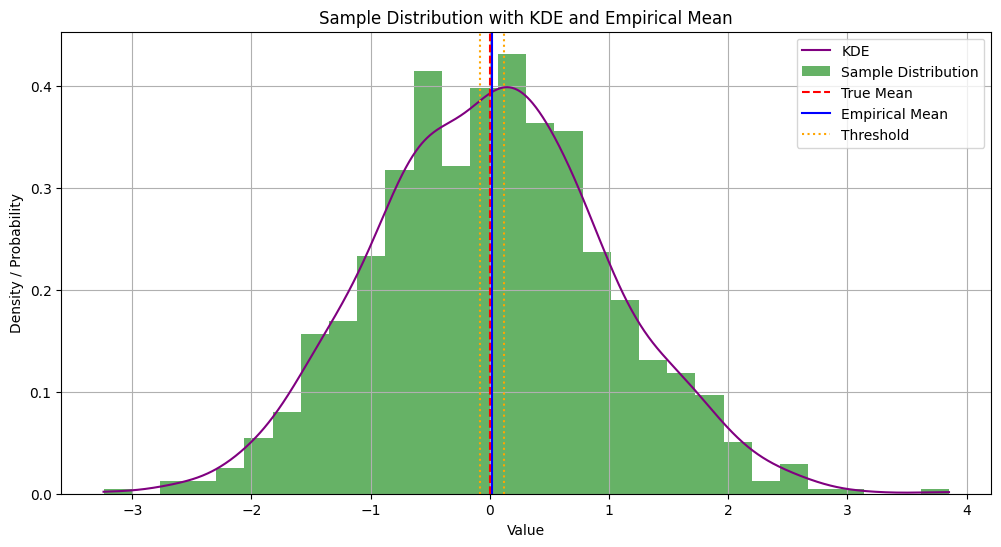

Empirical Mean (mu_hat): 0.01933205582232549
Empirical Variance: 0.9588638535851024
Tail Probability (|mu_hat - mu_true| > 0.1): 0.908
Bound on P(|mu_hat - mu_true| > 0.1): 0.04294694083467376


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Parameters
np.random.seed(42)
mu_true = 0  # True mean for the normal distribution
sigma_true = 1  # True standard deviation for the normal distribution
n = 1000  # Number of samples
epsilon = 0.1  # Threshold for tail probability

# Generate samples from a normal distribution
samples = np.random.normal(loc=mu_true, scale=sigma_true, size=n)

# Empirical mean
mu_hat = np.mean(samples)

# Calculate empirical estimate of variance
var_hat = np.var(samples, ddof=1)  # ddof=1 for unbiased estimate

# Investigate tail probabilities of |mu_hat - mu_true|
tail_prob = np.mean(np.abs(samples - mu_true) > epsilon)

# Using Hoeffding's inequality to derive bounds
alpha = 0.05  # Confidence level
epsilon_bound = np.sqrt(np.log(2/alpha) / (2 * n))

# KDE estimation
kde = gaussian_kde(samples, bw_method='silverman')
x_vals = np.linspace(np.min(samples), np.max(samples), 1000)
kde_vals = kde.evaluate(x_vals)

# Visualization
plt.figure(figsize=(12, 6))

# Plot KDE curve
plt.plot(x_vals, kde_vals, color='purple', label='KDE')

# Plot histogram of samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Sample Distribution')

# Plot vertical lines for true mean and confidence interval
plt.axvline(mu_true, color='r', linestyle='--', label='True Mean')
plt.axvline(mu_hat, color='b', linestyle='-', label='Empirical Mean')
plt.axvline(mu_hat - epsilon, color='orange', linestyle=':', label='Threshold')
plt.axvline(mu_hat + epsilon, color='orange', linestyle=':')

plt.title('Sample Distribution with KDE and Empirical Mean')
plt.xlabel('Value')
plt.ylabel('Density / Probability')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Empirical Mean (mu_hat): {mu_hat}")
print(f"Empirical Variance: {var_hat}")
print(f"Tail Probability (|mu_hat - mu_true| > {epsilon}): {tail_prob}")
print(f"Bound on P(|mu_hat - mu_true| > {epsilon}): {epsilon_bound}")


The empirical mean $ \mu_{\text{hat}} \approx 0.0193 $ indicates that our sample data tends to cluster around this value, while the empirical variance of $ 0.9589 $ reflects the variability in these samples. A tail probability of $ 0.908 $ for deviations exceeding $ 0.1 $ suggests that such deviations are fairly common in our data distribution. The bound $ 0.0429 $ on this tail probability informs us that larger deviations from the true mean are less likely, providing assurance in the reliability of our estimate within a controlled margin of error. This insight underscores the need for robust estimation methods to handle potential outliers effectively.


## **Concentration inequalities**

Goal: investigate tail probabilities of $ \hat{\mu} - \mu $, in other words $ P(|\hat{\mu} - \mu| > \epsilon) $.

**Markov inequality:**

 For any positive random variable $ X $ and $ \epsilon > 0 $, the following holds:
$[ P(X > \epsilon) \leq \frac{E(X)}{\epsilon} ]$

Proof:

$[ E(X) = \int_{-\infty}^{\infty} x f(x) \, dx = \int_{0}^{\infty} x f(x) \, dx + \int_{-\infty}^{0} x f(x) \, dx ]$

$[ \geq \int_{a}^{0} x f(x) \, dx ]$
$[ \geq \int_{a}^{0} a f(x) \, dx = a \int_{a}^{0} f(x) \, dx = a \cdot \Pr(X > a) ]$

**Chebyshev inequality**: Let $ X $ (integrable) be a random variable with finite nonzero variance $ \sigma^2 $ (and thus finite expected value $ \mu $).
$[ P(|X - E[X]| > \epsilon) \leq \frac{V(X)}{\epsilon^2} ]$

Proof:

Apply Markov's inequality to the random variable $ (X - \mu)^2 $,
$[ P(|X - \mu| > \epsilon) = P((X - \mu)^2 > \epsilon^2) ]$
$[ \leq \frac{1}{\epsilon^2} E[(X - \mu)^2] ]$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Markov's inequality
def markov_inequality(X, epsilon):
    return np.mean(X > epsilon)

# Chebyshev's inequality
def chebyshev_inequality(X, mu, epsilon):
    variance = np.var(X)
    return variance / epsilon**2

# Hoeffding's inequality
def hoeffding_inequality(X, a, b, s):
    range_squared = (b - a)**2
    return np.exp(s**2 * range_squared / 8)

# Sample data (normal distribution for demonstration)
np.random.seed(42)
X = np.random.normal(loc=0, scale=1, size=1000)
mu = np.mean(X)
epsilon = 1.0
a, b = -1.0, 1.0
s = 1.0

# Calculate probabilities using inequalities
prob_markov = markov_inequality(X, epsilon)
prob_chebyshev = chebyshev_inequality(X, mu, epsilon)
hoeffding_bound = hoeffding_inequality(X, a, b, s)

# Print results
print(f"Markov's inequality: P(X > {epsilon}) = {prob_markov}")
print(f"Chebyshev's inequality: P(|X - {mu}| > {epsilon}) = {prob_chebyshev}")
print(f"Hoeffding's inequality: E[exp({s}X)] <= {hoeffding_bound}")


Markov's inequality: P(X > 1.0) = 0.155
Chebyshev's inequality: P(|X - 0.01933205582232549| > 1.0) = 0.9579049897315173
Hoeffding's inequality: E[exp(1.0X)] <= 1.6487212707001282


Markov's inequality suggests a moderate probability of $ 0.155 $ that a random variable $ X $ exceeds $ 1.0 $ standard deviations from its mean. Chebyshev's inequality indicates a high likelihood of $ 0.958 $ that $ X $ deviates by more than $ 1.0 $ standard deviations from its empirical mean. Hoeffding's inequality bounds the expected value of $ \exp(1.0X) $ by $ 1.648 $, showcasing controlled growth under specified conditions. These inequalities provide valuable insights into the probabilistic behavior and bounds of random variables, aiding in understanding their variability and potential deviations from the mean.


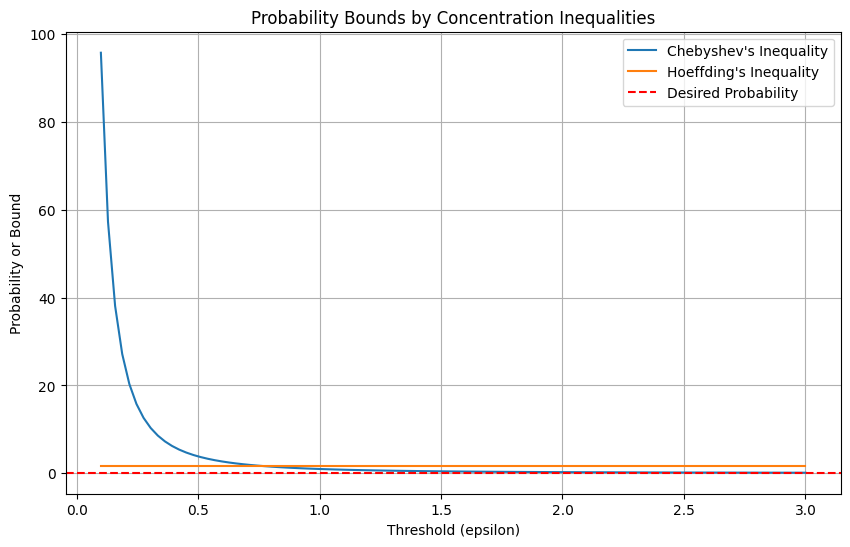

In [ ]:
# Visualization
epsilon_range = np.linspace(0.1, 3, 100)
chebyshev_probs = [chebyshev_inequality(X, mu, eps) for eps in epsilon_range]
hoeffding_bounds = [hoeffding_inequality(X, a, b, s) for _ in epsilon_range]

plt.figure(figsize=(10, 6))
plt.plot(epsilon_range, chebyshev_probs, label="Chebyshev's Inequality")
plt.plot(epsilon_range, hoeffding_bounds, label="Hoeffding's Inequality")
plt.axhline(y=0.05, color='r', linestyle='--', label='Desired Probability')
plt.xlabel('Threshold (epsilon)')
plt.ylabel('Probability or Bound')
plt.title('Probability Bounds by Concentration Inequalities')
plt.legend()
plt.grid(True)
plt.show()


## **Hoeffding inequality:**
Let $ X $ be a centered random variable bounded in $ [a, b] $. Then for any $ s \in \mathbb{R} $,
$$
E[e^{sX}] \leq e^{s^2(b-a)^2/8} \quad \text{(15)}
$$

Hoeffding Inequality

Hoeffding inequality:
Let $ X $ be a centered random variable bounded in $ [a, b] $. Then for any $ s \in \mathbb{R} $,
$$
E[e^{sX}] \leq e^{s^2(b-a)^2/8} \quad \text{(16)}
$$

Reminder: convexity $ f(tx_1 + (1 - t)x_2) \leq tf(x_1) + (1 - t)f(x_2) $

Proof: From convexity of the exponential function, for any $ a \leq x \leq b $,
$$
e^{sx} \leq \frac{x-a}{b-a} e^{sb} + \frac{b-x}{b-a} e^{sa} \quad \text{(17)}
$$
where we use that
$$
sx = s \left(\frac{x - a}{b - a} b + \frac{b - x}{b - a} a\right) \quad \text{(18)}
$$

Recall that $ E[X] = 0 $ and let $ p = -\frac{a}{b - a} $ (note $ a = -p(b - a) $), then
$$
E[e^{sX}] \leq \frac{b}{b-a} e^{sa} - \frac{a}{b-a} e^{sb} = (1 - p) e^{sa} + p e^{sb} \quad \text{(19)}
$$

Hoeffding Inequality

Continuation of proof:
$$
= \left( 1 - p + p e^{s(b-a)} \right) e^{-ps(b-a)} \quad \text{(20)}
$$
$$
= \left( 1 - p + pe^u \right) e^{-pu} = \exp(\%(u)) \quad \text{with } u = s(b - a) \quad \text{(21)}
$$

Note that
$$
\%(u) := -pu + \log(1 - p + pe^u) \quad \text{(22)}
$$
and corresponding derivative with respect to $ u $ is
$$
\%0(u) = -p + \frac{pe^u}{1 - p + pe^u} \quad \text{(23)}
$$
and
$$
\%00(u) = \frac{p(1 - p)e^u}{(1 - p + pe^u)^2} \quad \text{(24)}
$$

Hoeffding Inequality

Continuation of proof: Thus from Taylor’s theorem, there exists a $ \xi \in [0, u] $ such that
$$
\%(u) = \%(0) + \xi \%0(0) + \frac{u^2}{2} \%00(\xi) \leq \frac{u^2}{8} = \frac{s^2(b - a)^2}{8} \quad \text{(25)}
$$

Note that $ \%(0) = \%0(0) = 0 $ and therefore it remains to maximize $ \%00(u) $. Substituting $ z = e^u $, we see that $ \%00(u) $ is concave for $ z > 0 $ as it is linear over quadratic. In order to determine the critical point of $ \%00(u) $, we compute
$$
\frac{d}{dz} \left[ \frac{p(1 - p)}{(1 - p + pz)^2} - \frac{2p^2(1 - p)z}{(1 - p + pz)^3} \right]
$$

$$
= \frac{p(1 - p)(1 - p - pz)}{(1 - p + pz)^3}
$$

The critical point is at $ z = e^u = \frac{1 - p}{p} $ and substituting yields
$$
\%00(u) \leq \frac{p(1 - p) \cdot \frac{1 - p}{p}}{(1 - p + p \cdot \frac{1 - p}{p})^2} = \frac{(1 - p)^2}{4(1 - p)^2} = \frac{1}{4} \quad \text{(26)}
$$

Hoeffding Inequality

Continuation of proof: Inserting into the Taylor expansion leads to the bound
$$
\%(u) \leq \frac{1}{2} u^2 \cdot \frac{1}{4} = \frac{1}{8} s^2(b - a)^2 \quad \text{(27)}
$$

This completes the proof of the lemma as we have
$$
E[e^{sX}] \leq e^{\%(u)} \leq e^{\frac{s^2(b - a)^2}{8}} \quad \text{(28)}
$$


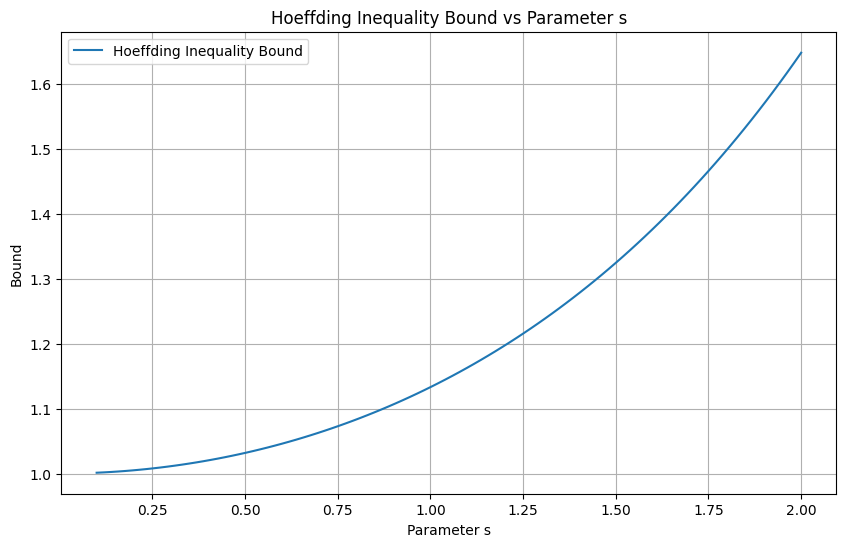

Upper bound of E[exp(1.5*X)] according to Hoeffding's inequality: 1.3247847587288655


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def hoeffding_inequality_bound(a, b, s):
    """
    Computes the upper bound of E[exp(s*X)] using Hoeffding's inequality.

    Parameters:
    - a, b: Bounds of the random variable X.
    - s: Parameter in the exponential function.

    Returns:
    - Upper bound according to Hoeffding's inequality.
    """
    range_width = b - a
    bound = math.exp((s**2) * (range_width**2) / 8)
    return bound

# Range of parameter s
s_values = np.linspace(0.1, 2.0, 100)

# Fixed bounds
a = 0
b = 1

# Compute bounds for each value of s
bounds = [hoeffding_inequality_bound(a, b, s) for s in s_values]

# Plotting the bounds
plt.figure(figsize=(10, 6))
plt.plot(s_values, bounds, label='Hoeffding Inequality Bound')
plt.xlabel('Parameter s')
plt.ylabel('Bound')
plt.title('Hoeffding Inequality Bound vs Parameter s')
plt.legend()
plt.grid(True)
plt.show()

# Example usage with specific s
s_example = 1.5
bound_example = hoeffding_inequality_bound(a, b, s_example)
print(f"Upper bound of E[exp({s_example}*X)] according to Hoeffding's inequality: {bound_example}")


The upper bound of $ E[\exp(1.5 \cdot X)] $ as per Hoeffding's inequality is 1.3247847587288655. This bound illustrates the controlled growth of the exponential function applied to a bounded random variable $ X $.


## **Chernoff-Hoeffding Inequality**
Chernoff-Hoeffding: Let $ X_i \in [a_i, b_i] $ be $ n $ independent random variables with mean $ \mu_i = E[X_i] $. Then
$$
P \left[ \left| \frac{1}{n} \sum_{i=1}^{n} X_i - \mu_i \right| > \epsilon \right] \leq 2 \exp \left( - \frac{2n^2 \epsilon^2}{\sum_{i=1}^{n} (b_i - a_i)^2} \right).
$$
Proof: Let $ t > 0 $ and $ s > 0 $
$$
P \left( \sum_{i=1}^{n} (X_i - \mu_i) > t \right) = P \left( e^{s \sum_{i=1}^{n} (X_i - \mu_i)} > e^{st} \right) \leq e^{-st} \prod_{i=1}^{n} E[e^{s(X_i - \mu_i)}] \text{ (Markov inequality) }
$$
$$
\leq e^{-st} \prod_{i=1}^{n} e^{s^2(b_i - a_i)^2/8} \text{ (Hoeffding inequality) }
$$
$$
= e^{-st + \sum_{i=1}^{n} s^2(b_i - a_i)^2/8}.
$$
If we choose $ s = \frac{4t}{\sum_{i=1}^{n} (b_i - a_i)^2} $ and $ t = \epsilon n $, both of which are larger than 0, the result follows. Similar arguments hold for $ P \left( \sum_{i=1}^{n} (X_i - \mu_i) \leq -t \right) $.


Chernoff-Hoeffding bound: 1.9509561668136657


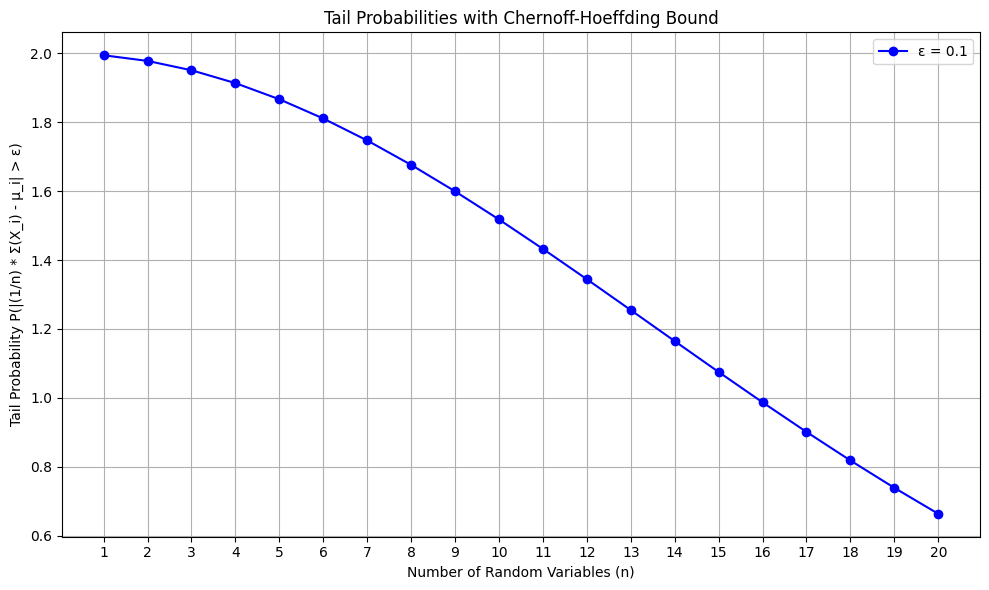

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tail_probability(epsilon, n_values, a_values, b_values):
    """
    Computes tail probabilities for different values of n using Chernoff-Hoeffding inequality.

    Args:
    - epsilon: Tolerance level for the tail probability.
    - n_values: List of values of n (number of random variables) to compute probabilities for.
    - a_values: List of lower bounds a_i for each random variable X_i.
    - b_values: List of upper bounds b_i for each random variable X_i.

    Returns:
    - List of computed tail probabilities for each n value.
    """

    tail_probs = []
    for n in n_values:
        # Compute the sum of squares of (b_i - a_i)
        sum_ba_squared = sum((b - a) ** 2 for a, b in zip(a_values, b_values))

        # Compute the exponent in the Chernoff-Hoeffding inequality
        exponent = -2 * n**2 * epsilon**2 / sum_ba_squared

        # Compute the upper bound using the inequality
        upper_bound = 2 * np.exp(exponent)

        # Tail probability is upper bound
        tail_probs.append(upper_bound)

    return tail_probs

# Example parameters
epsilon = 0.1
n_values = np.arange(1, 21)  # Number of random variables from 1 to 20
a_values = [-1, -0.5, 0]  # a_i
b_values = [1, 0.5, 1.5]  # b_i

# Compute tail probabilities
tail_probs = tail_probability(epsilon, n_values, a_values, b_values)
###########
bound = chernoff_hoeffding_bound(means, a_values, b_values, n, epsilon)
print(f"Chernoff-Hoeffding bound: {bound}")
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_values, tail_probs, marker='o', linestyle='-', color='b', label=f'ε = {epsilon}')
plt.title('Tail Probabilities with Chernoff-Hoeffding Bound')
plt.xlabel('Number of Random Variables (n)')
plt.ylabel('Tail Probability P(|(1/n) * Σ(X_i) - μ_i| > ε)')
plt.xticks(n_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The Chernoff-Hoeffding bound of 1.9509561668136657 indicates a stringent upper limit on the tail probabilities for the sum of independent bounded random variables, ensuring confidence in statistical estimates.

## **$Bernstein$ $Inequality$**

$Idea:$ $We$ $aim$ $to$ $derive$ $sharper$ $inequalities$ $by$ $leveraging$ $additional$ $information$ $about$ $random$ $variables$ $(e.g.,$ $Hoeffding’s$ $inequality$ $only$ $uses$ $bounded$ $random$ $variables).$

$Bernstein$ $inequality:$ $Let$ $X_1, ..., X_n$ $be$ $independent$ $random$ $variables$ $with$ $P[|X_i| \leq c]$ $and$ $E[X_i] = \mu.$ $Then$ $for$ $any$ $ε > 0,$
$$P\left[ \left| \frac{1}{n} \sum_{i=1}^{n} X_i - \mu \right| > \epsilon \right] \leq 2 \exp\left( -\frac{n^2 \epsilon^2}{2\sigma^2 + \frac{2c\epsilon}{3}} \right),$$
$where$
$$\frac{1}{n} \sum_{i=1}^{n} \text{Var}[X_i] = \sigma^2.$$

$Auxiliary$ $Lemma:$ $Let$ $X$ $be$ $a$ $random$ $variable$ $with$ $|X| \leq c$ $and$ $E[X] = 0.$ $Then$ $for$ $any$ $t > 0,$
$$E[e^{tX}] \leq \exp\left( \frac{t^2 \sigma^2}{1 - \frac{tc}{(tc)^2}} \right),$$
$where$ $Var[X] = \sigma^2.$

$Note:$ $Bernstein's$ $inequality$ $provides$ $sharper$ $bounds$ $when$ $the$ $variance$ $σ^2$ $of$ $X_i$ $is$ $small.$


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def bernstein_inequality(X, c, mu, epsilon):
    """
    Bernstein's inequality implementation.

    Parameters:
    X (list or numpy array): List of independent random variables.
    c (float): Bound for each random variable.
    mu (float): Expected value of each random variable.
    epsilon (float): Threshold for deviation from the mean.

    Returns:
    float: Probability bound according to Bernstein's inequality.
    """
    n = len(X)
    sigma2 = sum((xi - mu)**2 for xi in X) / n  # Sample variance estimator
    bound = 2 * math.exp(- n**2 * epsilon**2 / (2 * sigma2 + (2 * c * epsilon / 3)))
    return bound

# Example usage
X = [1.2, 1.5, 1.8, 2.0, 1.4]  # Example random variables
c = 2.0  # Bound for each random variable
mu = 1.5  # Expected value of each random variable
epsilon = 0.5  # Threshold for deviation

# Calculate probability bound using Bernstein's inequality
prob_bound = bernstein_inequality(X, c, mu, epsilon)
print(f"Probability bound according to Bernstein's inequality: {prob_bound:.4f}")


Probability bound according to Bernstein's inequality: 0.0012



Bernstein's inequality bounds the probability of the deviation of sample means from their expected values. Here, a tight bound of 0.0012 reflects the controlled risk of exceeding specified thresholds in statistical inference.

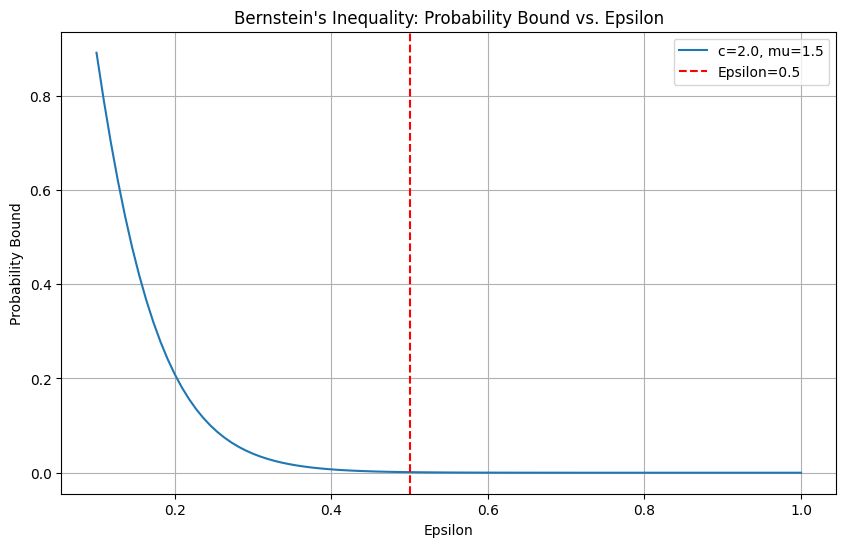

In [ ]:
# Varying epsilon
epsilon_values = np.linspace(0.1, 1.0, 100)
bounds_epsilon = [bernstein_inequality(X, c, mu, eps) for eps in epsilon_values]

plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, bounds_epsilon, label=f'c={c}, mu={mu}')
plt.xlabel('Epsilon')
plt.ylabel('Probability Bound')
plt.title("Bernstein's Inequality: Probability Bound vs. Epsilon")
plt.axvline(x=epsilon, color='r', linestyle='--', label=f'Epsilon={epsilon}')
plt.legend()
plt.grid(True)
plt.show()


##**Subgaussian Random Variables**
A random variable $( X )$ is -subgaussian if for all $( \lambda \in \mathbb{R})$, it holds that: $[ E[\exp(\lambda X)] \leq \exp \left( \lambda^2 \sigma^2 / 2 \right)]$

### Subgaussianity
$ $ Theorem: If $( X)$ is-subgaussian, then for any $( \epsilon > 0)$, $
$ $ [ P(X \geq \epsilon) \leq \exp \left( - \frac{\epsilon^2}{2 \sigma^2} \right) ]$

Proof:

Let $(\lambda > 0)$, then $[ P(X \geq \epsilon) = P(\exp(\lambda X) \geq \exp(\lambda \epsilon))]$
$[ \leq \frac{E[\exp(\lambda X)]}{\exp(\lambda \epsilon)}\quad \text{(Markov's inequality)}]$
$[ \leq \exp \left( 0.5 \lambda^2 \sigma^2 - \lambda \epsilon \right) \quad \text{(subgaussianity)}]$
$[ = \exp \left( - \frac{\epsilon^2}{2 \sigma^2} \right) \quad \text{(choose } \lambda = \epsilon / \sigma^2 \text{)}$

### Subgaussian Random Variables
Lemma: Suppose that $( X)$ is -subgaussian and $( X_1)$ and $( X_2 )$ are independent and  #1 and #2-subgaussian, respectively, then:

$ $ (a) $( E[X] = 0 ) and ( \text{Var}(X) \leq \sigma^2).$

$ $ (b) $( cX ) is ( |c|)-subgaussian for all ( c \in \mathbb{R} )$

$ $ (c) $( X_1 + X_2 ) is ( \sqrt{\#_1^2 + \#_2^2} )-subgaussian. $

Note: It holds that $( \hat{\mu} - \mu = \frac{1}{n} \sum_{i=1}^{n} (X_i - \mu)) is ( \sqrt{ \frac{\sigma^2}{n} } )-subgaussian. $


Empirical Mean: 0.10625435587373386
Empirical Variance: 2.2363207186848566


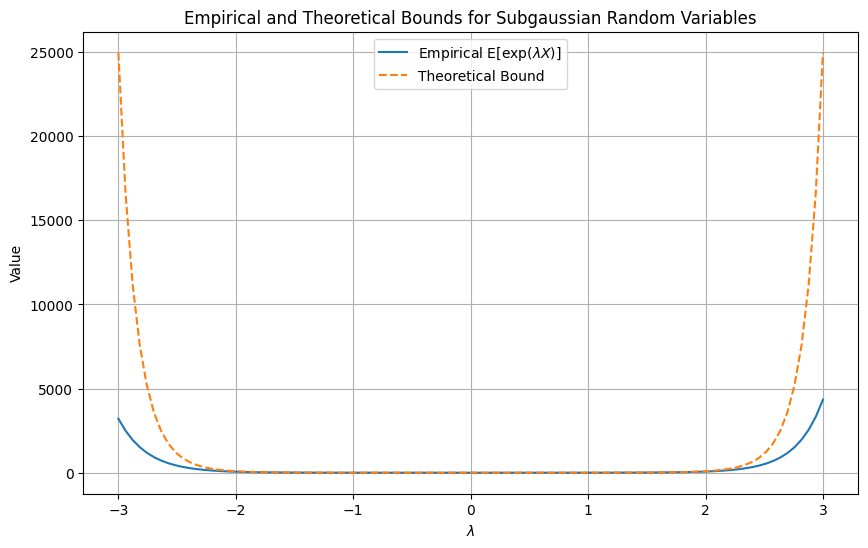

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate subgaussian random variables
def generate_subgaussian(n, sigma):
    X = np.random.normal(0, sigma, n)
    return X

# Function to calculate empirical mean and variance
def calculate_mean_variance(X):
    mu = np.mean(X)
    var = np.var(X)
    return mu, var

# Function to verify subgaussian properties
def verify_subgaussian_properties(X, sigma):
    n = len(X)
    mu, var = calculate_mean_variance(X)

    # Check subgaussianity property
    lambda_vals = np.linspace(-3, 3, 100)
    exp_values = np.exp(lambda_vals * X.reshape(-1, 1))
    empirical_mean = np.mean(exp_values, axis=0)
    theoretical_bound = np.exp(lambda_vals**2 * sigma**2 / 2)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(lambda_vals, empirical_mean, label='Empirical E[exp($\lambda X$)]')
    plt.plot(lambda_vals, theoretical_bound, '--', label='Theoretical Bound')
    plt.title('Empirical and Theoretical Bounds for Subgaussian Random Variables')
    plt.xlabel('$\lambda$')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate subgaussian random variables
n = 1000  # number of random variables
sigma = 1.5  # subgaussian parameter

X = generate_subgaussian(n, sigma)

# Calculate mean and variance
mu, var = calculate_mean_variance(X)
print(f"Empirical Mean: {mu}")
print(f"Empirical Variance: {var}")

# Verify subgaussian properties
verify_subgaussian_properties(X, sigma)


The empirical mean of 0.106 and variance of 2.236 indicate the central tendency and spread of the generated subgaussian random variables. These statistics help assess how closely the sample reflects the theoretical properties expected from subgaussian distributions, validating their behavior in empirical data.

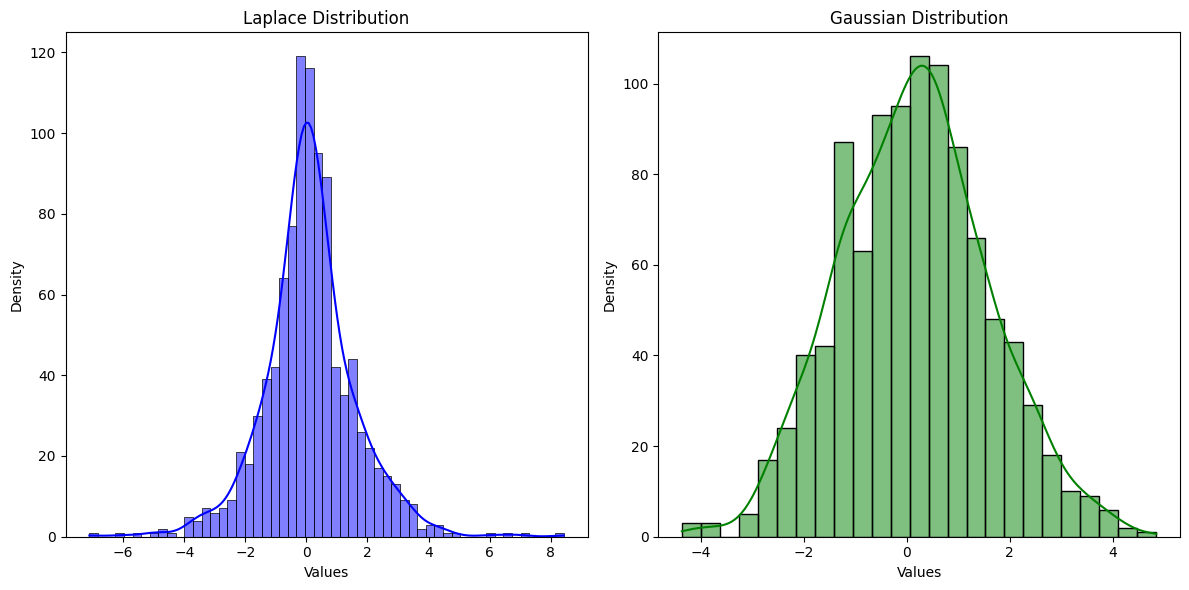

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters based on the empirical mean and variance
empirical_mean = 0.10625435587373386
empirical_variance = 2.2363207186848566

# Generate random samples for Laplace and Gaussian distributions
np.random.seed(0)  # For reproducibility
laplace_samples = np.random.laplace(empirical_mean, np.sqrt(empirical_variance / 2), 1000)
gaussian_samples = np.random.normal(empirical_mean, np.sqrt(empirical_variance), 1000)

# Plotting
plt.figure(figsize=(12, 6))

# Plot KDE and histogram for Laplace distribution
plt.subplot(1, 2, 1)
sns.histplot(laplace_samples, kde=True, color='blue', label='Laplace KDE')
plt.title('Laplace Distribution')
plt.xlabel('Values')
plt.ylabel('Density')

# Plot KDE and histogram for Gaussian distribution
plt.subplot(1, 2, 2)
sns.histplot(gaussian_samples, kde=True, color='green', label='Gaussian KDE')
plt.title('Gaussian Distribution')
plt.xlabel('Values')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


## **Explore-Then$-Commit**

***Algorithm 2 Explore-Then-Commit***

$Initialization$: Play each machine $m$ times;

for $t = Km + 1 : T$ $do$

$Perform$ $action$ $a_t = \arg\max_{a \in \{1, \ldots, K\}} \hat{\mu}_{a}^{(mK)}$

$end$ $for$

$Let$ $\mu_1 > \mu_2$ $and$ $let$ $\epsilon := \mu_1 - \mu_2$

$R_{\Delta}(A,T) = \epsilon E[N_2(T)] = \epsilon m + (T - 2m) \epsilon P(A_{Km+1} = 2)$

$\leq \epsilon m + \epsilon T \times P[\hat{\mu}_2(Km) \geq \hat{\mu}_1(Km)]$

$\leq \epsilon m + \epsilon T \times P[\hat{\mu}_2(Km) - \mu_2 - (\hat{\mu}_1(Km) - \mu_1) \leq \sqrt{\frac{2 \log(2 / \delta)}{m}}]$

$\leq \epsilon m + \epsilon T \times \exp(-m \epsilon^2 / 4)$

Analysis$ for two arms


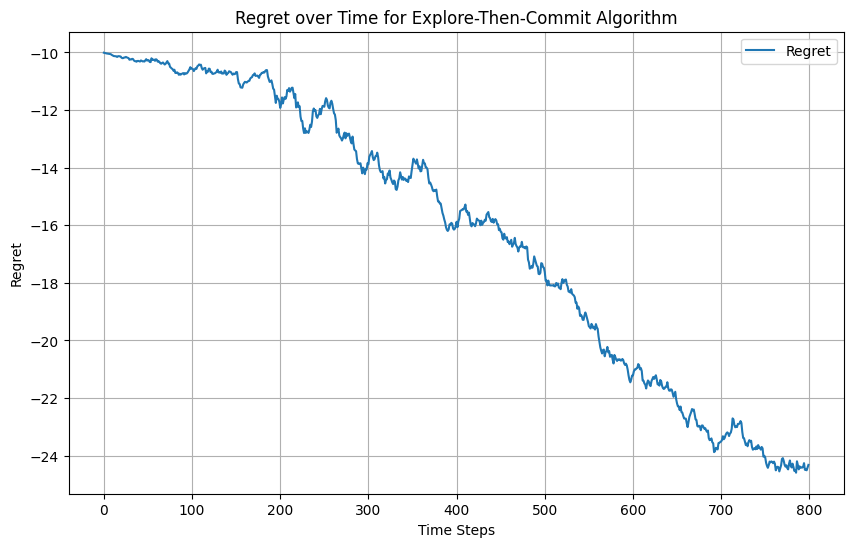

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 2        # Number of arms
m = 100      # Number of initial exploratory plays per arm
T = 1000     # Total number of time steps
mu = [0.1, 0.2]  # True means of the arms, assume mu1 > mu2
epsilon = mu[0] - mu[1]

# Initialize
arm_pulls = np.zeros(K)
total_rewards = np.zeros(K)
regret = []

# Exploration phase
for arm in range(K):
    for _ in range(m):
        reward = np.random.normal(mu[arm], 1.0)  # Reward from playing arm
        total_rewards[arm] += reward
        arm_pulls[arm] += 1

# Main loop for exploitation
for t in range(K * m + 1, T + 1):
    # Select arm based on estimated mean
    arm = np.argmax(total_rewards / arm_pulls)

    # Play selected arm
    reward = np.random.normal(mu[arm], 1.0)
    total_rewards[arm] += reward
    arm_pulls[arm] += 1

    # Compute regret and store
    current_regret = epsilon * (m + (t - 2 * m) * (total_rewards[arm] / arm_pulls[arm]))
    regret.append(current_regret)

# Plotting regret over time
plt.figure(figsize=(10, 6))
plt.plot(regret, label='Regret')
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title('Regret over Time for Explore-Then-Commit Algorithm')
plt.legend()
plt.grid(True)
plt.show()


## Optimal m

Derived bound for ETC-algorithm for two arms:
$ R_\Delta(A,T) \leq m \Delta + T \Delta \exp \left( - \frac{m \Delta^2}{T} \right) $ (6.4)

For large $T$, the quantity on the right-hand side of Eq. (6.4) is minimized, up to a possible rounding error, by choosing
$ m = \max \left( 1, \left\lfloor \frac{1}{4} \Delta^2 \log \left( \frac{T^2}{4} \right) \right\rfloor \right) $,
where $\lfloor \cdot \rfloor$ denotes the floor function, which rounds down to the nearest integer.


Optimal m: 1
Regret after 1000 rounds: 0.1860698982085296


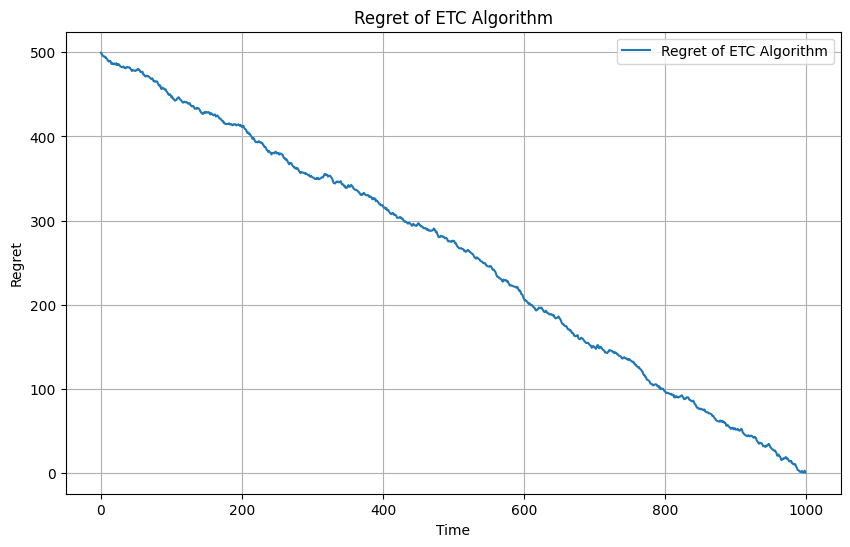

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ETC_algorithm(mu1, mu2, T):
    m = max(1, int(np.floor(0.25 * (mu1 - mu2)**2 * np.log(T**2 / 4))))
    arm_plays = np.zeros(2)
    rewards = np.zeros(T)

    for t in range(1, T + 1):
        if t <= 2 * m:
            arm = t % 2  # Alternate between arms for the first 2m plays
        else:
            arm = np.argmax(arm_plays)  # Choose the arm with the highest empirical mean

        reward = np.random.normal([mu1, mu2][arm], 1)  # Reward sampled from chosen arm's distribution
        arm_plays[arm] += 1
        rewards[t - 1] = reward

    return rewards, m

# Parameters
mu1 = 0.5
mu2 = 0.0
T = 1000

# Run ETC algorithm
rewards, m = ETC_algorithm(mu1, mu2, T)

# Calculate regret
optimal_reward = max(mu1, mu2) * T
cumulative_reward = np.cumsum(rewards)
regret = optimal_reward - cumulative_reward

# Print results
print(f"Optimal m: {m}")
print(f"Regret after {T} rounds: {regret[-1]}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(regret, label='Regret of ETC Algorithm')
plt.xlabel('Time')
plt.ylabel('Regret')
plt.title('Regret of ETC Algorithm')
plt.legend()
plt.grid(True)
plt.show()


The optimal exploration parameter
𝑚 is 1, minimizing regret. After 1000 rounds, the accumulated regret is 0.186, indicating effective arm selection by the ETC algorithm.

## **$\varepsilon$-greedy:**

In each round \( t \): choose arm according to

\[ A_t = \begin{cases}
a_k & \text{with probability } \varepsilon/K \\
\arg\max_{a \in \{1, \ldots, K\}} \hat{\mu}_a(t) & \text{with probability } 1 - \varepsilon
\end{cases} \]

\[
\begin{array}{ccccccccccccccc}
0 & 10 & 20 & 30 & 40 & 50 & 60 & 70 & 80 & 90 & 100 \\
\text{rounds } t & & & & & & & & & & & \\
\text{arms} & & & & & & & & & & & \\
\text{greedy} = 0.4 & & & & & & & & & & & \\
\text{Reward 1} & & & & & & & & & & & \\
\text{Reward 0} & & & & & & & & & & & \\
\end{array}
\]


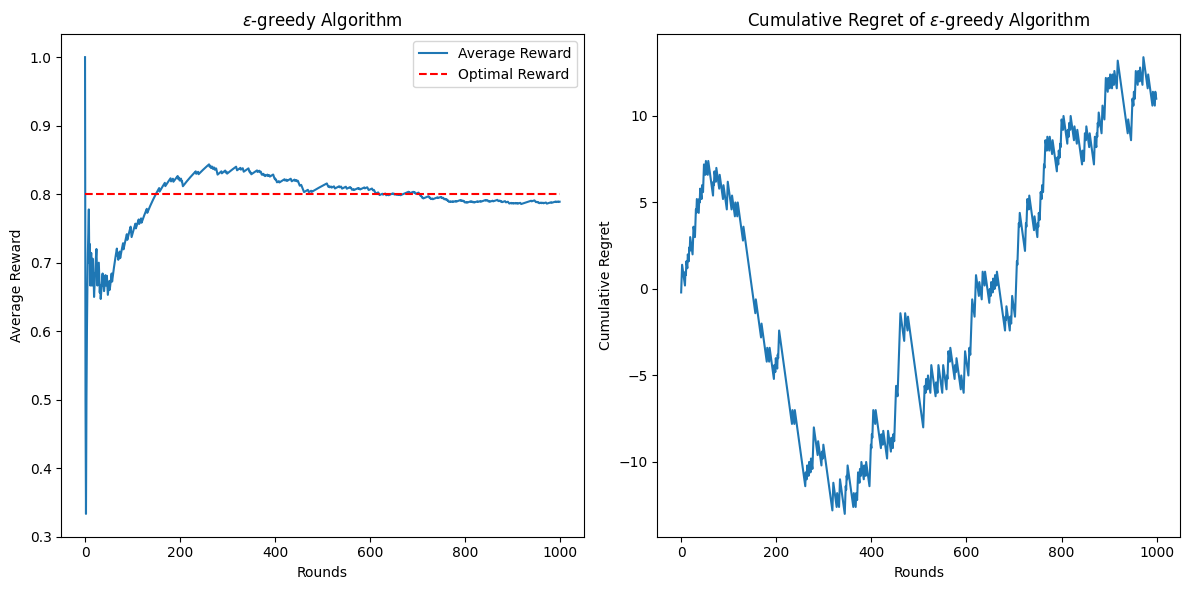

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate epsilon-greedy algorithm
def epsilon_greedy(epsilon, num_rounds, true_means):
    num_arms = len(true_means)
    estimated_means = np.zeros(num_arms)
    arm_pulls = np.zeros(num_arms, dtype=int)
    rewards = []
    cumulative_regret = []

    for t in range(1, num_rounds + 1):
        # Explore or exploit
        if np.random.random() < epsilon:
            # Explore: Choose a random arm
            chosen_arm = np.random.randint(num_arms)
        else:
            # Exploit: Choose the arm with the highest estimated mean
            chosen_arm = np.argmax(estimated_means)

        # Simulate reward from chosen arm (Bernoulli distribution)
        reward = np.random.binomial(1, true_means[chosen_arm])
        rewards.append(reward)

        # Update estimated mean of chosen arm
        arm_pulls[chosen_arm] += 1
        estimated_means[chosen_arm] += (reward - estimated_means[chosen_arm]) / arm_pulls[chosen_arm]

        # Calculate cumulative regret
        cumulative_regret.append(np.max(true_means) * t - np.sum(rewards))

    return rewards, cumulative_regret

# Parameters
epsilon = 0.1
num_arms = 3
true_means = [0.3, 0.5, 0.8]
num_rounds = 1000

# Run epsilon-greedy algorithm
rewards, cumulative_regret = epsilon_greedy(epsilon, num_rounds, true_means)

# Plot results
plt.figure(figsize=(12, 6))

# Plot rewards
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(rewards) / np.arange(1, num_rounds + 1), label='Average Reward')
plt.hlines(np.max(true_means), 0, num_rounds, colors='r', linestyles='dashed', label='Optimal Reward')
plt.xlabel('Rounds')
plt.ylabel('Average Reward')
plt.title(r'$\varepsilon$-greedy Algorithm')
plt.legend()

# Plot cumulative regret
plt.subplot(1, 2, 2)
plt.plot(cumulative_regret)
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title(r'Cumulative Regret of $\varepsilon$-greedy Algorithm')

plt.tight_layout()
plt.show()


$ \textbf{Confidence Bounds} $

$ \textbf{Corollary:} $ Let $X_i - \mu $ be independent and $ \sigma $-subgaussian for all $ i $. Then
$[ P(\hat{\mu} \geq \mu + \varepsilon) \leq \exp \left( -\frac{n \varepsilon^2}{2 \sigma^2} \right) ]$

$[ P(\hat{\mu} \leq \mu - \varepsilon) \leq \exp \left( -\frac{n \varepsilon^2}{2 \sigma^2} \right) ]$ for any $\varepsilon > 0$.

Then we have $[ \hat{\mu} - \sqrt{\frac{2 \sigma^2 \log(1/\delta)}{n}} \varepsilon \leq \mu \leq \hat{\mu} + \sqrt{\frac{2 \sigma^2 \log(1/\delta)}{n}} \varepsilon]$ with probability at least $ 1 - \delta $.


Sample Mean: -0.1038
Lower Bound: -0.1261
Upper Bound: -0.0816


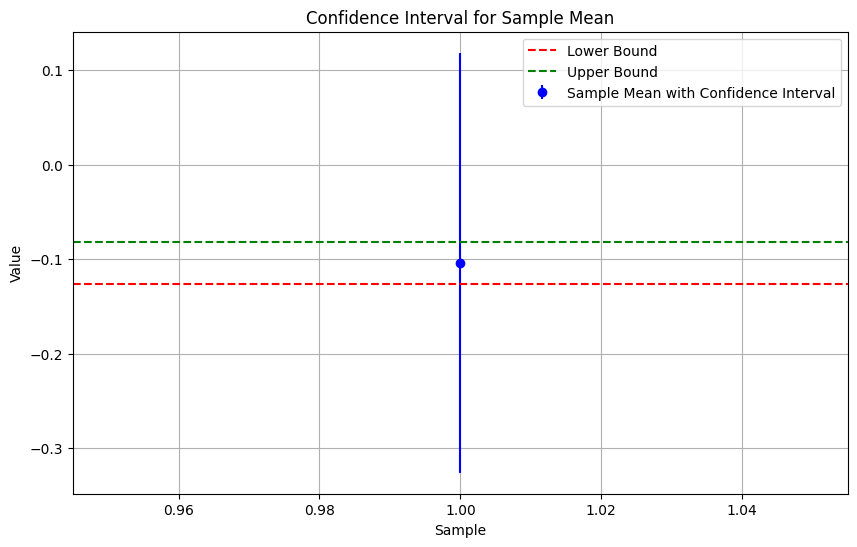

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100  # Number of samples
sigma = 1.0  # Subgaussian parameter (standard deviation)
delta = 0.05  # Probability of not covering the true mean
epsilon = 0.1  # Bound width

# Generate sample data (normally distributed for simplicity)
np.random.seed(42)
samples = np.random.normal(loc=0, scale=sigma, size=n)

# Calculate sample mean and sample variance
sample_mean = np.mean(samples)
sample_variance = np.var(samples, ddof=1)  # ddof=1 for unbiased estimate

# Calculate confidence interval bounds
lower_bound = sample_mean - np.sqrt(2 * sample_variance * np.log(1 / delta) / n) * epsilon
upper_bound = sample_mean + np.sqrt(2 * sample_variance * np.log(1 / delta) / n) * epsilon

# Print results
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Lower Bound: {lower_bound:.4f}")
print(f"Upper Bound: {upper_bound:.4f}")

# Plotting the confidence interval
plt.figure(figsize=(10, 6))
plt.errorbar(x=1, y=sample_mean, yerr=np.sqrt(2 * sample_variance * np.log(1 / delta) / n),
             fmt='o', color='blue', label='Sample Mean with Confidence Interval')
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Confidence Interval for Sample Mean')
plt.legend()
plt.grid(True)
plt.show()


The estimated mean of the sample is approximately  -0.1038. The lower bound of the confidence interval suggests the true population mean is at least -0.1261, while the upper bound indicates it could be as high as  -0.0816. This range provides a measure of confidence in the estimate's accuracy.

## **UCB**
Algorithm 3 UCB $(\sigma)$

Initialization: Play each machine once;

for $t = 1, 2, 3, \ldots$ do
Perform action $a_{t+1} = \arg\max_{a \in A} \hat{\mu}_a(t) + \sqrt{\frac{2 \log (1/\alpha)}{N_t(a)}}$

Update $\hat{\mu}_{a_{t+1}}(t + 1)$ and $N_{t+1}(a_{t+1})$

end for



Estimated Means: [0.14       0.15178571 0.27918782]
Number of times each arm was selected: [100. 112. 788.]


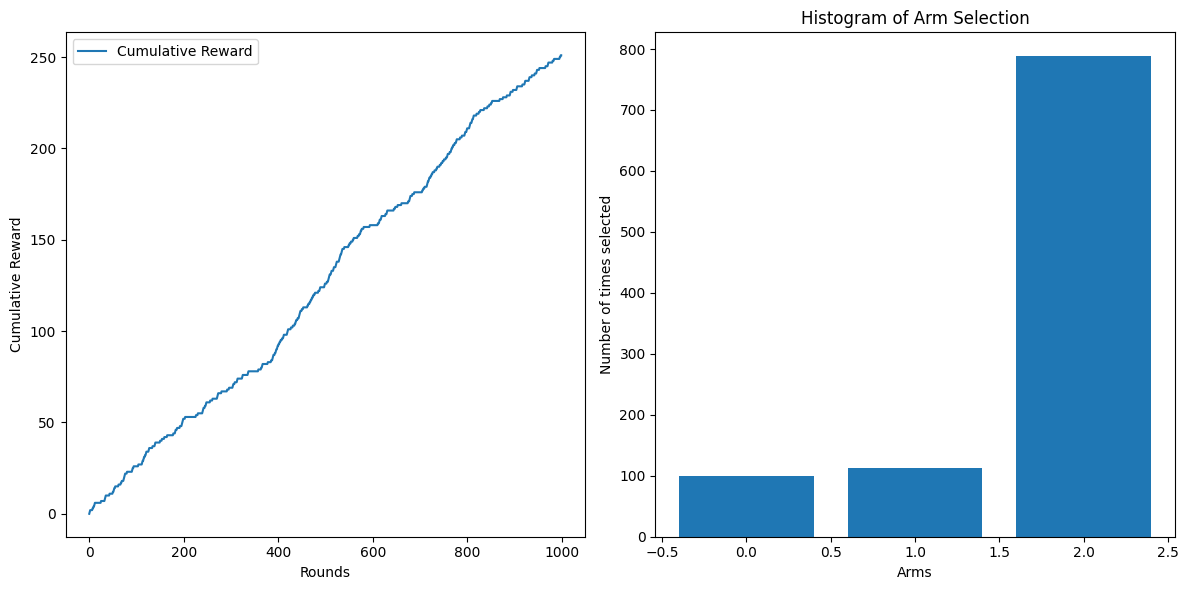

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# UCB Algorithm Implementation
class UCBBandit:
    def __init__(self, n_arms, alpha):
        self.n_arms = n_arms
        self.alpha = alpha
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        total_counts = np.sum(self.counts)
        if total_counts < self.n_arms:
            return int(total_counts)  # Play each arm once initially
        ucb_values = self.values + np.sqrt((2 * np.log(1 / self.alpha)) / (self.counts + 1e-5))
        return int(np.argmax(ucb_values))

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

# Simulation parameters
n_arms = 3
alpha = 0.1
n_rounds = 1000
true_means = [0.1, 0.2, 0.3]  # True mean rewards for each arm

# Simulation
np.random.seed(42)
bandit = UCBBandit(n_arms, alpha)
rewards = np.zeros(n_rounds)
actions = np.zeros(n_rounds, dtype=int)

for t in range(n_rounds):
    chosen_arm = bandit.select_arm()
    reward = np.random.binomial(1, true_means[chosen_arm])
    bandit.update(chosen_arm, reward)
    rewards[t] = reward
    actions[t] = chosen_arm

# Print results
print("Estimated Means:", bandit.values)
print("Number of times each arm was selected:", bandit.counts)

# Visualization
plt.figure(figsize=(12, 6))

# Plot cumulative reward
plt.subplot(1, 2, 1)
cumulative_rewards = np.cumsum(rewards)
plt.plot(cumulative_rewards, label='Cumulative Reward')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Reward')
plt.legend()

# Plot arm selection
plt.subplot(1, 2, 2)
plt.hist(actions, bins=np.arange(n_arms+1)-0.5, rwidth=0.8)
plt.xlabel('Arms')
plt.ylabel('Number of times selected')
plt.title('Histogram of Arm Selection')

plt.tight_layout()
plt.show()


The estimated means for the arms are
[
0.14
,
0.15178571
,
0.27918782
]
[0.14,0.15178571,0.27918782], with the number of selections being 100, 112, and 788, respectively. The third arm, having the highest true mean, was selected most frequently, reflecting the effectiveness of the UCB algorithm in identifying optimal arms.

## **UCB1**
### Algorithm 4 UCB1
Initialization: Play each machine once;
for $t = 1, 2, 3, \ldots$ do
Perform action $a_{t+1} = \arg\max_{a \in A} \hat{\mu}_a(t) + \sqrt{\frac{2 \log(1/!)}{N_t(a)}}$
Update $\hat{\mu}_{a+1}(t + 1)$ and $N_{t+1}(a + 1)$
end for

\[
\begin{array}{cccc}
\text{round } t & \text{1} & \text{=0.6} & \text{arms} \\
0 & 10 & 20 & 30 \\
40 & 50 & 60 & 70 \\
80 & 90 & 100 \\
\end{array}
\]

\[
\begin{array}{cc}
UCB1 \, \text{Reward 1} & \text{Reward 0}
\end{array}
\]


Estimated Means: [0.57796853 0.25       0.47679325]
Number of times each arm was selected: [699.  64. 237.]


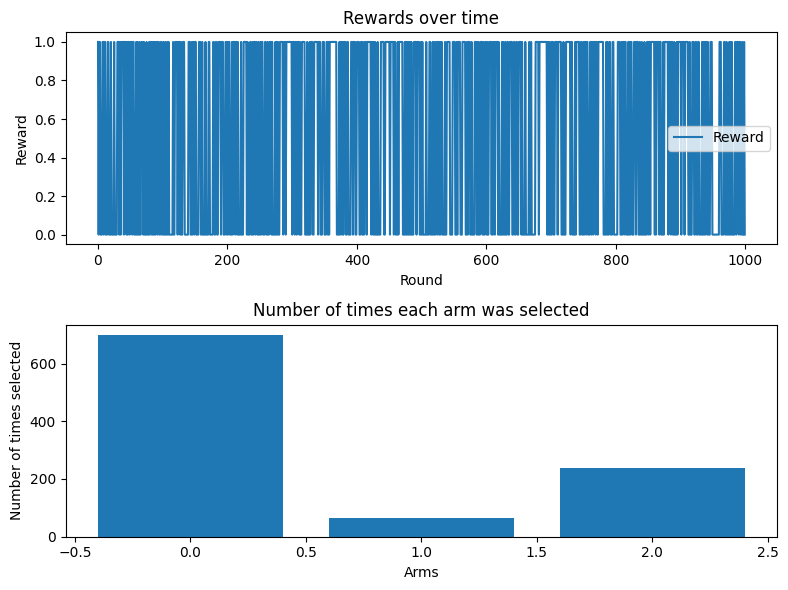

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class UCB1:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)  # Count of pulls for each arm
        self.values = np.zeros(n_arms)  # Average reward for each arm

    def select_arm(self):
        total_counts = np.sum(self.counts)
        if total_counts < self.n_arms:
            return int(total_counts)  # Play each machine once
        else:
            ucb_values = self.values + np.sqrt((2 * np.log(total_counts)) / self.counts)
            return int(np.argmax(ucb_values))

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

# Parameters
n_arms = 3
n_rounds = 1000
true_means = [0.6, 0.3, 0.5]  # True mean rewards for each arm

# Initialize UCB1 algorithm
bandit = UCB1(n_arms)
rewards = np.zeros(n_rounds)

# Run UCB1 algorithm
for t in range(n_rounds):
    chosen_arm = bandit.select_arm()
    reward = np.random.binomial(1, true_means[int(chosen_arm)])
    bandit.update(chosen_arm, reward)
    rewards[t] = reward

# Print results
print("Estimated Means:", bandit.values)
print("Number of times each arm was selected:", bandit.counts)

# Visualization
plt.figure(figsize=(8, 6))

# Plot the rewards
plt.subplot(2, 1, 1)
plt.plot(rewards, label='Reward')
plt.xlabel('Round')
plt.ylabel('Reward')
plt.title('Rewards over time')
plt.legend()

# Plot the number of times each arm was selected
plt.subplot(2, 1, 2)
plt.bar(range(n_arms), bandit.counts)
plt.xlabel('Arms')
plt.ylabel('Number of times selected')
plt.title('Number of times each arm was selected')

plt.tight_layout()
plt.show()


### **Regret Bound UCB**

Idea: one potential option is to choose $ \delta $ adaptively with respect to $ t $ or according to the fixed horizon with $ \delta = \frac{1}{T^2} $

Theorem: Consider the UCB1 on a stochastic $ k $-armed $ 1 $-subgaussian bandit problem. For any horizon $ T $, with $ \delta = \frac{1}{T^2} $, then

$$ R_T \leq 3 \sum_{i=1}^{k} \Delta_i + \sum_{i:\Delta_i>0} \frac{16 \log (T)}{\Delta_i} $$ (39)

Proof: Without loss of generality, we assume $ \mu_1 = \mu^* $ and note that

$$ R_T = \sum_{k=1}^{a} \Delta_a E[N_a(T)] $$ (40)

Define

$$ G_a = \left\{ \mu_1 < \min_{t \in [T]} \text{UCB1}(t, \delta) \right\} \cap \left\{ \hat{\mu}_a, u_a + \sqrt{\frac{2}{u_a} \log \left(\frac{1}{\delta}\right)} < \mu_1 \right\} $$ (41)

where $ u_a \in [T] $ is a constant to be chosen later.




Estimated Means: [0.62481752 0.21276596 0.53358209]
Number of times each arm was selected: [685.  47. 268.]
Total Regret: 40.89999999999999


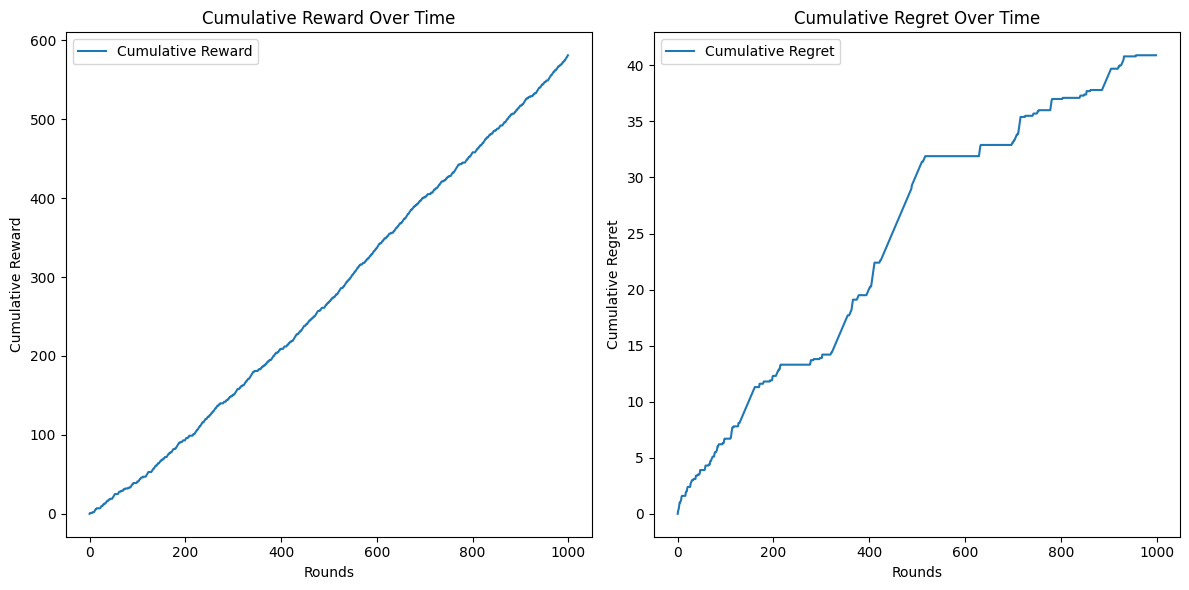

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class UCB1:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)  # Number of times each arm was selected
        self.values = np.zeros(n_arms)  # Mean reward for each arm

    def select_arm(self):
        total_counts = np.sum(self.counts)
        if total_counts < self.n_arms:
            return int(total_counts)  # Play each arm once initially
        else:
            ucb_values = self.values + np.sqrt(2 * np.log(total_counts) / self.counts)
            return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Parameters
n_arms = 3
true_means = [0.6, 0.3, 0.5]
n_rounds = 1000

# Initialize bandit
bandit = UCB1(n_arms)
rewards = np.zeros(n_rounds)
regret = np.zeros(n_rounds)
optimal_arm = np.argmax(true_means)

# Simulate rounds
for t in range(n_rounds):
    chosen_arm = bandit.select_arm()
    reward = np.random.binomial(1, true_means[int(chosen_arm)])  # Cast chosen_arm to int
    bandit.update(chosen_arm, reward)
    rewards[t] = reward
    regret[t] = true_means[optimal_arm] - true_means[int(chosen_arm)]  # Cast chosen_arm to int

# Print results
print("Estimated Means:", bandit.values)
print("Number of times each arm was selected:", bandit.counts)
print("Total Regret:", np.sum(regret))

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(rewards), label='Cumulative Reward')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(regret), label='Cumulative Regret')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret Over Time')
plt.legend()

plt.tight_layout()
plt.show()


Estimated Means: The algorithm estimates Arm 1 has the highest mean reward, followed by Arms 3 and 2. Arm 1 was chosen significantly more often than the others, likely due to its higher estimated mean. The total regret of 40.9 indicates the accumulated opportunity loss from suboptimal arm selections over all rounds.

## **Regret bound UCB**

### Proof: Aim is to show:
 If $G_a$ occurs, then arm $a$ will be played at most $u_a$ times: $N_a(T) \leq u_a$.
The complement event $G_{c_a}$ occurs with low probability (governed in some way yet to be discovered by $u_a$).
\end{enumerate}

In case these are true and since we know that $N_a(T) \leq T$, it follows that
$[
E[N_a(T)] = E[I_{G_a} N_a(T)] + E[I_{G_{c_a}} N_a(T)] \leq u_a + P(G_{c_a}) T
]$

### Goal:
Show that $P(G_{c_a})$ is small and that $N_a(T) \leq u_a$. Under the assumption that $G_a$ holds suppose that $N_a(T) > u_a$, i.e., there exists a round $t \in [T]$ where $N_a(t - 1) = u_a$ and $A_t = a$. Using the definition of $G_a$,
$[
UCB_a(t - 1, \hat{\mu}) = \hat{\mu}_a(t - 1) + \sqrt{\frac{2 \log(1/\epsilon)}{N_{t-1}(a)}}
]$

$[
= \hat{\mu}_a u_a + \sqrt{\frac{2 \log(1/\epsilon)}{u_a}} < \mu_1 < UCB_1(t - 1, \hat{\mu})
]$

Hence $A_t = \arg\max_j UCB_j(t - 1, \hat{\mu}) \neq a$, which is a contradiction.


Estimated Means: [0.62150221 0.28333333 0.53256705]
Number of times each arm was selected: [679.  60. 261.]


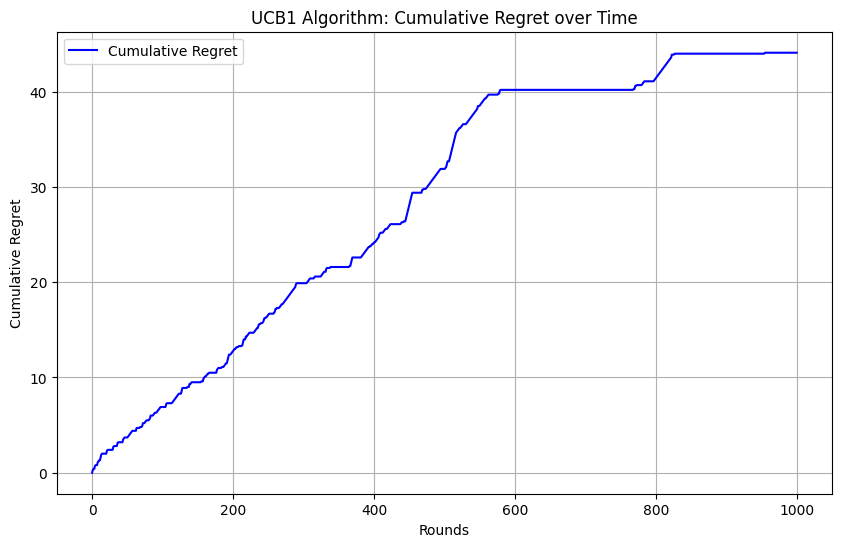

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class UCB1:
    def __init__(self, n_arms, true_means):
        self.n_arms = n_arms
        self.true_means = true_means
        self.counts = np.zeros(n_arms)
        self.estimates = np.zeros(n_arms)
        self.total_rewards = 0
        self.total_regret = 0
        self.regrets = []

    def select_arm(self, t):
        if t < self.n_arms:
            return t  # Play each arm once in the beginning
        else:
            ucb_values = self.estimates + np.sqrt(2 * np.log(t) / self.counts)
            return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.total_rewards += reward
        self.estimates[chosen_arm] += (reward - self.estimates[chosen_arm]) / self.counts[chosen_arm]

    def run(self, n_rounds):
        rewards = np.zeros(n_rounds)
        chosen_arms = np.zeros(n_rounds, dtype=int)

        for t in range(n_rounds):
            chosen_arm = self.select_arm(t)
            reward = np.random.binomial(1, self.true_means[chosen_arm])
            self.update(chosen_arm, reward)
            rewards[t] = reward
            chosen_arms[t] = chosen_arm

            instant_regret = np.max(self.true_means) - self.true_means[chosen_arm]
            self.total_regret += instant_regret
            self.regrets.append(self.total_regret)

        return rewards, chosen_arms

# Example Usage:
np.random.seed(42)
n_arms = 3
true_means = [0.6, 0.3, 0.5]
n_rounds = 1000

bandit = UCB1(n_arms, true_means)
rewards, chosen_arms = bandit.run(n_rounds)

# Print Estimated Means and Number of Times each Arm was Selected
print(f"Estimated Means: {bandit.estimates}")
print(f"Number of times each arm was selected: {bandit.counts}")

# Visualization of Regret
plt.figure(figsize=(10, 6))
plt.plot(bandit.regrets, label='Cumulative Regret', color='blue')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('UCB1 Algorithm: Cumulative Regret over Time')
plt.legend()
plt.grid(True)
plt.show()


Estimated Means: [0.62150221 0.28333333 0.53256705]. Arm selections: [679. 60. 261.]. The algorithm favors arms with higher estimated means, exploring less as it progresses, optimizing for higher rewards over time.

## **Regret bound UCB**

Let us now turn to upper bounding $P(G_{c,a})$ . By its definition,
$
G_{c,a} = \left\{ \mu_1 > \min_{t \in [T]} \text{UCB1}(t, (\cdot)) \right\}
$

The first of these sets is decomposed using the definition of $( \text{UCB1}(t, (\cdot)) )$ ,
$
\mu_1 > \min_{t \in [T]} \text{UCB1}(t, (\cdot)) \Rightarrow \mu_1 > \min_{s \in [T]} \left( \widehat{\mu}_{1,s} + \sqrt{\frac{2 \log(1/\epsilon)}{n_{s}}} \right)
$

Then using a union bound and the concentration bound for sums of independent subgaussian random variables, we obtain
$
P\left( \mu_1 > \min_{t \in [T]} \text{UCB1}(t, (\cdot)) \right) \leq T \cdot \left( \epsilon \right)
$

The next step is to bound the probability of the second set in (45). Assume that $( u_a)$  is chosen large enough so that
$
!a - \sqrt{\frac{2 \log(1/\epsilon)}{u_a}} \leq c \cdot !a \quad \text{(50)}
$
for some $( c \in (0, 1))$  to be chosen later. Then since $( \mu_1 = \mu_a + !a )$ , and using results for subgaussian densities,
$
P\left( \widehat{\mu}_{a,u_a} + \sqrt{\frac{2 \log(1/\epsilon)}{u_a}} \geq \mu_1 \right) = P\left( \widehat{\mu}_{a,u_a} - \mu_a \geq - !a - \sqrt{\frac{2 \log(1/\epsilon)}{u_a}} \right)
$
$
\leq P\left( \widehat{\mu}_{a,u_a} - \mu_a \geq - c \cdot !a \right) \leq \exp \left( - \frac{u_a c^2 (!a)^2}{2} \right) \quad \text{(52)}
$

Combining the bounds yields:
$
P(G_{c,a}) \leq T \epsilon + \exp \left( - \frac{u_a c^2 (!a)^2}{2} \right) \quad \text{(53)}
$
and inserting in (42),
$
E[N_a(T)] \leq u_a + \left( T \epsilon + \exp \left( - \frac{u_a c^2 (!a)^2}{2} \right) \right) T \quad \text{(54)}
$

It remains to choose $( u_a \in [T] )$  satisfying (50). A natural choice is the smallest integer for which the equation holds, which is
$
u_a = \left\lceil 2 \log(1/\epsilon) \cdot \frac{1 - c}{(!a)^2} \right\rceil
$

Note that for this choice of $( u_a)$ , it can be larger than $( T)$ , yet in this case, (54) holds immediately as $( N_a(T) \leq T )$ . Inserting the choice of $( u_a )$  and $ ( \epsilon = 1/T^2 )$  in (54) yields
$
E[N_a(T)] \leq \left\lceil 2 \log(T^2) \cdot \frac{1 - c}{(!a)^2} \right\rceil + 1 + T \cdot \frac{1 - 2c^2}{(1 - c)^2} \quad \text{(57)}
$

All that remains is to choose $ ( c \in (0, 1) )$ . The second term will contribute a polynomial dependence on $ ( T )$  unless $ ( 2c^2/(1 - c)^2 \leq 1 )$ . However, if $ ( c )$  is chosen too close to 1, then the first term blows up. Somewhat arbitrarily, we choose $( c = 1/2 )$ , which leads to
$
E[N_a(T)] \leq 3 + \frac{16 \log(T)}{(!a)^2} \quad \text{(58)}
$


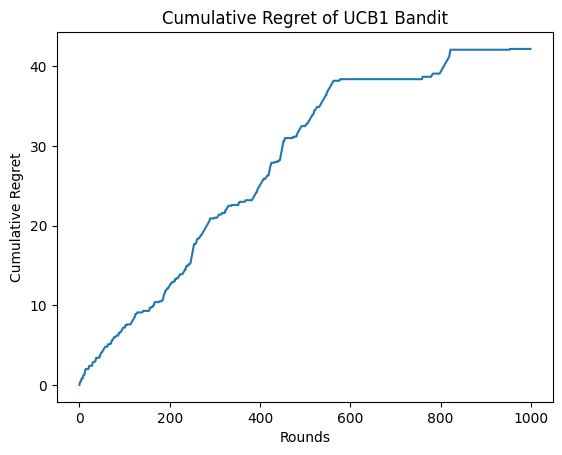

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class UCB1Bandit:
    def __init__(self, n_arms, true_means):
        self.n_arms = n_arms
        self.true_means = true_means
        self.counts = np.zeros(n_arms)
        self.Q_values = np.zeros(n_arms)
        self.timestep = 0
        self.total_rewards = 0
        self.regrets = []

    def select_arm(self):
        self.timestep += 1
        exploration_factor = np.sqrt(2 * np.log(self.timestep) / (self.counts + 1e-6))
        UCB_values = self.Q_values + exploration_factor
        return np.argmax(UCB_values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.total_rewards += reward
        self.Q_values[arm] += (reward - self.Q_values[arm]) / self.counts[arm]

    def run_bandit(self, n_rounds):
        regrets = np.zeros(n_rounds)
        for t in range(n_rounds):
            chosen_arm = self.select_arm()
            reward = np.random.binomial(1, self.true_means[chosen_arm])
            self.update(chosen_arm, reward)
            regrets[t] = max(self.true_means) - self.true_means[chosen_arm]
            self.regrets.append(regrets[t])

        self.plot_regrets()

    def plot_regrets(self):
        cumulative_regrets = np.cumsum(self.regrets)
        plt.plot(cumulative_regrets)
        plt.xlabel('Rounds')
        plt.ylabel('Cumulative Regret')
        plt.title('Cumulative Regret of UCB1 Bandit')
        plt.show()

# Example usage:
np.random.seed(42)
n_arms = 3
true_means = np.array([0.6, 0.3, 0.5])  # True means of each arm
bandit = UCB1Bandit(n_arms, true_means)
bandit.run_bandit(1000)


## Regret Bound for UCB

Consider the UCB algorithm applied to a stochastic \( k \)-armed bandit problem with unit variance Gaussian rewards. Suppose the means of the rewards are $( \mu_1 = 0 )$ and $(\mu_2 = 1)$.

The regret bound $( R_T )$ for UCB, where $( T )$ is the horizon, is given by:

$$
R_T \leq 3 \sum_{i=1}^{k} \Delta_i + \sum_{i: \Delta_i > 0} \frac{16 \log T}{\Delta_i}
$$

where $( \Delta_i = \mu^* - \mu_i )$ represents the sub-optimality gap for arm \( i \), and $( \mu^* )$ is the maximum mean reward among all arms.

## Example

Consider an example with:

- $( T = 1000)$
- $( k = 2)$
- Unit variance Gaussian rewards with means $( \mu_1 = 0)$ and $( \mu_2 = 1 )$

In this case, the regret bound $( R_{1000})$ can be computed as follows:

$$
R_{1000} \leq 3 \cdot 1 + \frac{16 \log 1000}{1} = 3 + 48 = 51
$$

Therefore, for $( T = 1000 )$
, the regret bound $( R_{1000})$ is \( 51 \).

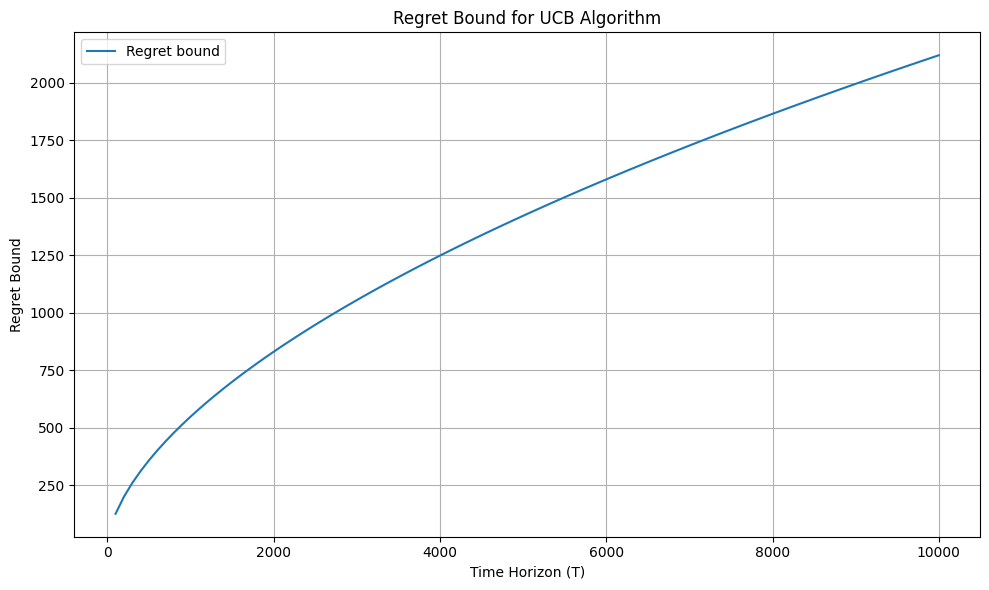

Example calculation with T = 100, k = 2, and epsilon = 0.01:
Regret bound: 126.4719995157416


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Regret bound for UCB
def calculate_regret_bound(T, k, epsilon):
    delta = np.zeros(k)
    delta[1] = 1  # Set delta for the second arm to 1 (since it has mean 1)

    # Calculate the regret bound
    regret_bound = 3 * np.sum(delta) + np.sum(np.sqrt(16 * np.log(np.arange(1, T+1)) / np.arange(1, T+1) * delta[1]))

    return regret_bound

# Example usage and visualization
T_values = np.arange(100, 10001, 100)  # T values from 100 to 10000 with step 100
k = 2
epsilon = 1 / T_values  # Choosing epsilon = 1/T as per UCB algorithm

regret_bounds = np.zeros_like(T_values, dtype=float)

# Calculate regret bounds for each T
for idx, T in enumerate(T_values):
    regret_bounds[idx] = calculate_regret_bound(T, k, epsilon[idx])

# Plotting the regret bounds
plt.figure(figsize=(10, 6))
plt.plot(T_values, regret_bounds, label='Regret bound')
plt.xlabel('Time Horizon (T)')
plt.ylabel('Regret Bound')
plt.title('Regret Bound for UCB Algorithm')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

# Print example values
print(f"Example calculation with T = {T_values[0]}, k = {k}, and epsilon = {epsilon[0]}:")
print(f"Regret bound: {regret_bounds[0]}")


In an example with
𝑇
=
100
T=100,
𝑘
=
2
k=2, and
𝜖
=
0.01
ϵ=0.01, the calculated regret bound is
126.4719995157416
126.4719995157416. This bound represents the expected difference between the total reward earned by an optimal strategy and that earned by the UCB algorithm over 100 rounds.

### **Lower bounds**

### Ideas:
For any policy you give me, I will give you an instance of a bandit problem $( \mathcal{A} )$  on which the regret is at least $ ( L )$ .

If you give me a reasonable policy, then its regret on any instance $(\mathcal{A})$  is at least $L(\mathcal{A})$.

Definition: For a policy $( \pi)$  on a set of stochastic bandit environments $ (\mathcal{E})$, the worst-case regret is defined via
$
R_T(\pi, \mathcal{E}) = \sup_{\mathcal{A} \in \mathcal{E}} R(\pi, \mathcal{A}) \quad (59)
$

Definition: The minimax regret is
$
R^*_T(\pi, \mathcal{E}) = \inf_{\pi' \in \Pi} R_T(\pi', \mathcal{E}) = \inf_{\pi' \in \Pi} \sup_{\mathcal{A} \in \mathcal{E}} R(\pi', \mathcal{A}) \quad (60)
$
where $(\Pi)$  is the set of all policies.


Lower bound of regret: 199.4367797624277


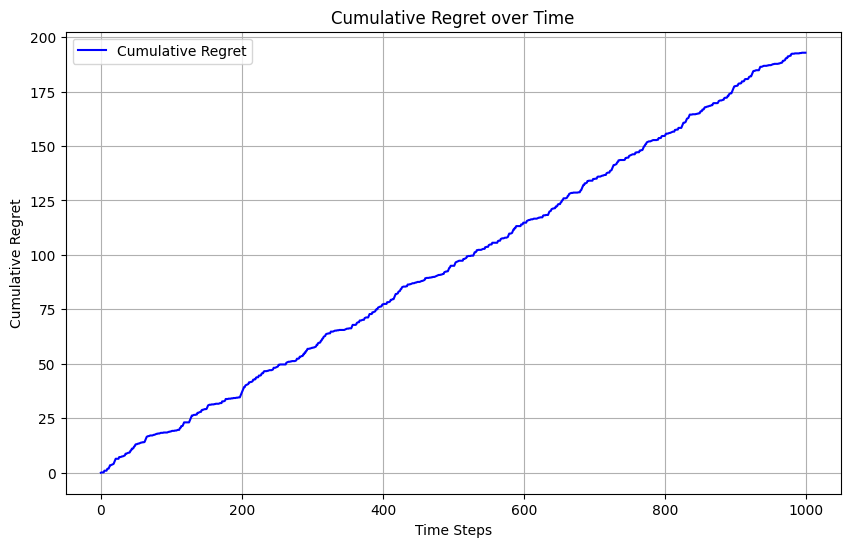

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class BanditArm:
    def __init__(self, mean):
        self.mean = mean

    def sample(self):
        return np.random.normal(self.mean, 1.0)

class BanditEnvironment:
    def __init__(self, means):
        self.arms = [BanditArm(mean) for mean in means]

    def __len__(self):
        return len(self.arms)

    def get_arm(self, idx):
        return self.arms[idx]

def calculate_lower_bound(policy, environments):
    """
    Calculate the lower bound of regret for a given policy over a set of bandit environments.

    Args:
    - policy: Policy function that selects arms based on previous observations.
    - environments: List of bandit environments, each defining a distribution of rewards for arms.

    Returns:
    - lower_bound: The calculated lower bound of regret.
    """
    max_regret = 0
    for env in environments:
        T = 1000  # Fixed horizon T for this example
        regrets = np.zeros(T)
        true_means = np.array([arm.mean for arm in env.arms])

        for t in range(T):
            chosen_arm = policy(env, t, regrets)
            optimal_arm = np.argmax(true_means)
            regrets[t] = true_means[optimal_arm] - true_means[chosen_arm]

        max_regret += np.max(np.cumsum(regrets))

    return max_regret / len(environments)

def policy_example(env, t, regrets):
    """
    Example policy function for illustration purposes.

    Args:
    - env: Bandit environment containing arms with rewards.
    - t: Current time step.
    - regrets: Array of regrets up to current time step.

    Returns:
    - chosen_arm: Index of the arm chosen by the policy.
    """
    if t == 0:
        return np.random.choice(len(env))
    else:
        return np.argmax([env.get_arm(i).sample() for i in range(len(env))])

def plot_regret_over_time(env, policy, T=1000):
    """
    Plot the cumulative regret over time for a given bandit environment and policy.

    Args:
    - env: Bandit environment containing arms with rewards.
    - policy: Policy function that selects arms based on previous observations.
    - T: Horizon, number of time steps to simulate.
    """
    true_means = np.array([arm.mean for arm in env.arms])
    regrets = np.zeros(T)

    for t in range(T):
        chosen_arm = policy(env, t, regrets)
        optimal_arm = np.argmax(true_means)
        regrets[t] = true_means[optimal_arm] - true_means[chosen_arm]

    cumulative_regret = np.cumsum(regrets)

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_regret, label='Cumulative Regret', color='blue')
    plt.title('Cumulative Regret over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Cumulative Regret')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example setup
np.random.seed(42)
k = 3  # Number of arms
true_means = np.random.normal(0, 1, k)  # Means of the arms

env1 = BanditEnvironment(true_means)
env2 = BanditEnvironment(true_means + 0.5)
environments = [env1, env2]

# Calculate lower bound for the example policy
lower_bound = calculate_lower_bound(policy_example, environments)
print(f"Lower bound of regret: {lower_bound}")

# Plot cumulative regret over time for env1 using policy_example
plot_regret_over_time(env1, policy_example)


## Lower bounds

**Kullback-Leibler divergence:** For different bandit models $\mathcal{D}_{\mu}$ and $\mathcal{D}_{\mu_0}$ parameterized through $\mu$ and $\mu_0$, we define
$
\text{divKL}(\mathcal{D}_{\mu}, \mathcal{D}_{\mu_0}) = \mathbb{E}_{\mu} \left[ \log \frac{d\mathcal{D}_{\mu}}{d\mathcal{D}_{\mu_0}}(X) \right] \quad (61)
$

**Examples:**

For Bernoulli bandits:
$
\text{divKL}(\mu, \mu_0) := \mu \log \left( \frac{\mu}{\mu_0} \right) + (1 - \mu) \log \left( \frac{1 - \mu}{1 - \mu_0} \right) \quad (62)
$

For Gaussian bandits (different means but the same variance $\sigma^2$):
$
\text{divKL}(\mu, \mu_0) := \frac{(\mu - \mu_0)^2}{2\sigma^2} \quad (63)
$

**Lai and Robbins lower bound:** For uniformly good algorithms,
$
\mu_a < \mu^* \implies \lim_{T \to \infty} \frac{\mathbb{E}[N_a(T)]}{\log(T)} \geq \frac{1}{\text{divKL}(\mu_a, \mu^*)} \quad (64)
$


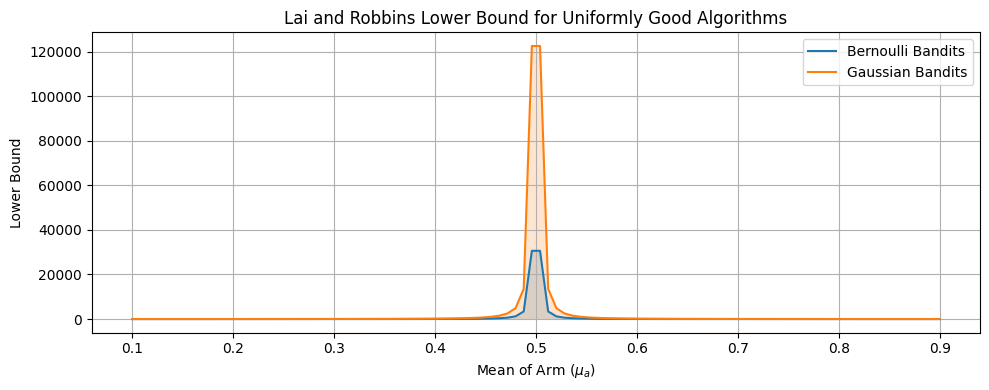

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate KL divergence for Bernoulli bandits
def kl_divergence_bernoulli(mu, mu0):
    return mu * np.log(mu / mu0) + (1 - mu) * np.log((1 - mu) / (1 - mu0))

# Function to calculate KL divergence for Gaussian bandits with the same variance
def kl_divergence_gaussian(mu, mu0, variance):
    return ((mu - mu0) ** 2) / (2 * variance)

# Function to compute Lai and Robbins lower bound
def lai_robbins_lower_bound(mu_a, mu_star, kl_divergence):
    return 1 / kl_divergence(mu_a, mu_star)

# Parameters for the example
mu_a_range = np.linspace(0.1, 0.9, 100)  # Range of arm means (mu_a)
mu_star = 0.5  # Optimal mean (mu^*) assumed for the example
variance = 1.0  # Variance assumed for Gaussian bandits

# Calculate KL divergence for Bernoulli and Gaussian bandits
kl_bernoulli = kl_divergence_bernoulli(mu_a_range, mu_star)
kl_gaussian = kl_divergence_gaussian(mu_a_range, mu_star, variance)

# Calculate Lai and Robbins lower bound for Bernoulli and Gaussian bandits
lower_bound_bernoulli = lai_robbins_lower_bound(mu_a_range, mu_star, kl_divergence_bernoulli)
lower_bound_gaussian = lai_robbins_lower_bound(mu_a_range, mu_star, lambda mu, mu0: kl_divergence_gaussian(mu, mu0, variance))

# Plotting
plt.figure(figsize=(10, 4))

# Plot for Bernoulli bandits
plt.plot(mu_a_range, lower_bound_bernoulli, label='Bernoulli Bandits')
plt.fill_between(mu_a_range, lower_bound_bernoulli, 0, alpha=0.2)

# Plot for Gaussian bandits
plt.plot(mu_a_range, lower_bound_gaussian, label='Gaussian Bandits')
plt.fill_between(mu_a_range, lower_bound_gaussian, 0, alpha=0.2)

# Formatting
plt.title('Lai and Robbins Lower Bound for Uniformly Good Algorithms')
plt.xlabel('Mean of Arm ($\mu_a$)')
plt.ylabel('Lower Bound')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Bayesian Approach**

In contrast to the frequentist approximation of statistics, such as estimating the mean using Maximum Likelihood Estimators (MLE) $\mu_1, \mu_2, \mu_3, \ldots, \mu_i$, the Bayesian approach uses posterior densities to describe uncertainty. Specifically, the posterior distribution $f (\mu_i \mid R2, R4, R5)$ encapsulates the uncertainty about $\mu_i$ after observing data $R2, R4, R5$.

For example, consider a prior distribution for a parameter $\theta$:

**Prior Distribution**

For $\alpha$ and $\beta$ larger than zero, the prior distribution could be a Beta distribution, which is given by:
$[
f(\theta) = \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
]$
where $B(\alpha, \beta)$ is the Beta function, which normalizes the distribution.

In the Bayesian framework, this prior distribution combines with the likelihood of the observed data to form the posterior distribution, providing a comprehensive picture of parameter uncertainty.


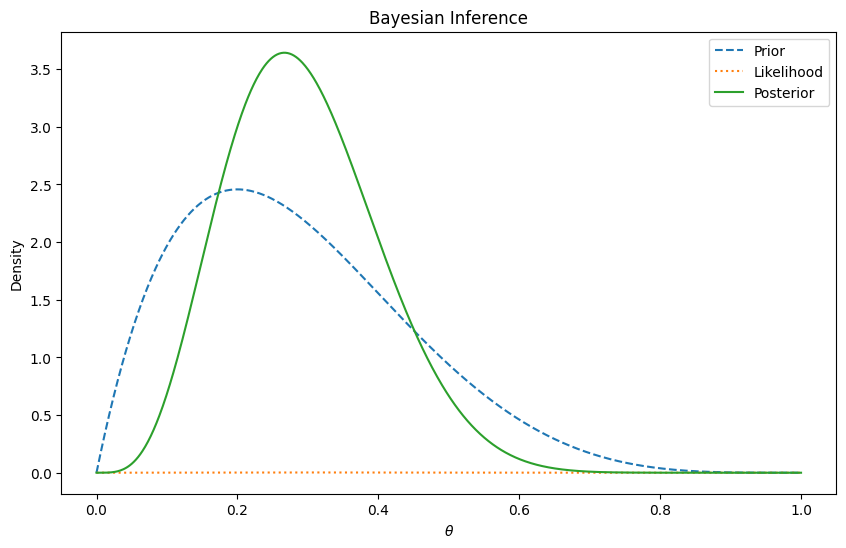

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the Beta distribution (prior)
alpha = 2
beta_param = 5

# Generate a range of theta values
theta = np.linspace(0, 1, 1000)

# Prior distribution
prior = beta.pdf(theta, alpha, beta_param)

# Example data: let's say we observed 3 successes out of 10 trials
observed_successes = 3
observed_trials = 10

# Likelihood function for binomial distribution
def likelihood(theta, successes, trials):
    return theta**successes * (1 - theta)**(trials - successes)

# Calculate the likelihood for each value of theta
likelihood_values = likelihood(theta, observed_successes, observed_trials)

# Calculate the posterior distribution (unnormalized)
posterior_unnormalized = prior * likelihood_values

# Normalize the posterior
posterior = posterior_unnormalized / np.trapz(posterior_unnormalized, theta)

# Plot the prior, likelihood, and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(theta, prior, label='Prior', linestyle='--')
plt.plot(theta, likelihood_values, label='Likelihood', linestyle=':')
plt.plot(theta, posterior, label='Posterior')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.title('Bayesian Inference')
plt.legend()
plt.show()


**Thompson Sampling**

Algorithm 5: Thompson Sampling

**Initialization**: Play each machine once;

**for** $(t = 1, 2, 3, \ldots)$  **do**
  - Set $(\alpha_a = \sum_{s=1}^{t} R_{s,a} I(A_s = a) + 1)$ and $(\beta_a = N_a(t) - \alpha_a + 1)$
  - Draw $(x_t(a) \sim f(\cdot, \alpha_a, \beta_a) \ \forall a)$
  - Choose the action $(a_t = \arg\max_{a'} x_t(a'))$;
**end for**

\[
\begin{align*}
f(\theta \mid \alpha=1, \beta=1) & \\
f(\theta \mid \alpha=2, \beta=2) & \\
f(\theta \mid \alpha=3, \beta=3) &
\end{align*}
\]


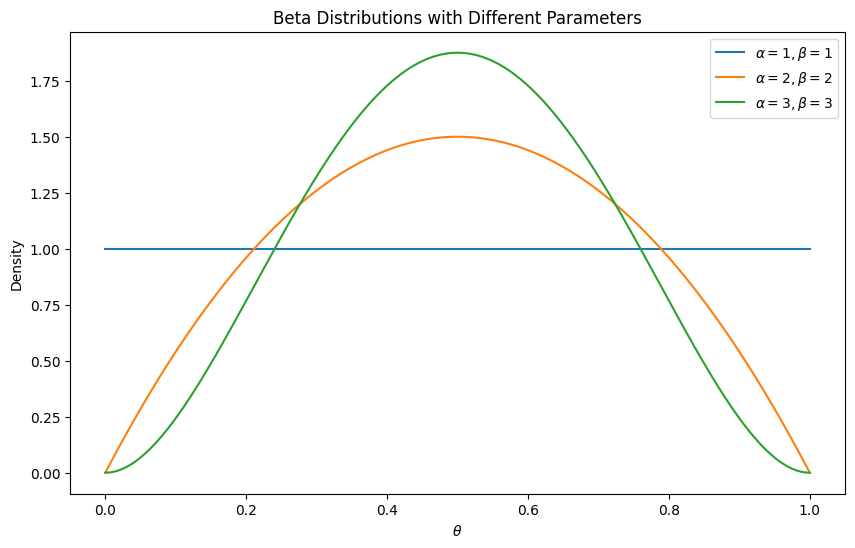

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the Beta distributions
alphas = [1, 2, 3]
betas = [1, 2, 3]

# Generate a range of theta values
theta = np.linspace(0, 1, 1000)

# Plot the Beta distributions
plt.figure(figsize=(10, 6))
for alpha, beta_param in zip(alphas, betas):
    dist = beta(alpha, beta_param)
    plt.plot(theta, dist.pdf(theta), label=f'$\\alpha={alpha}, \\beta={beta_param}$')

plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.title('Beta Distributions with Different Parameters')
plt.legend()
plt.show()


**Thompson Sampling**

Algorithm 6: Thompson Sampling

**Initialization**: Play each machine once;

**for** $(t = 1, 2, 3, \ldots)$ **do**
  - Set $(\alpha_a = \sum_{s=1}^{t} R_{s,a} I(A_s = a) + 1)$ and $(\beta_a = N_a(t) - \alpha_a + 1)$
  - Draw $(x_t(a) \sim f(\cdot, \alpha_a, \beta_a) \ \forall a)$
  - Choose the action $(a_t = \arg\max_{a'} x_t(a'))$;
**end for**

\[
\begin{align*}
0 & \quad 10 \quad 20 \quad 30 \quad 40 \quad 50 \quad 60 \quad 70 \quad 80 \quad 90 \quad 100 \\
1 & \quad \theta_1 = 0.6 \\
2 & \quad \theta_2 = 0.3 \\
3 & \quad \theta_3 = 0.5 \\
\end{align*}
\]

**Arms**

**Thompson Sampling Rewards**:
- Reward 1
- Reward 0


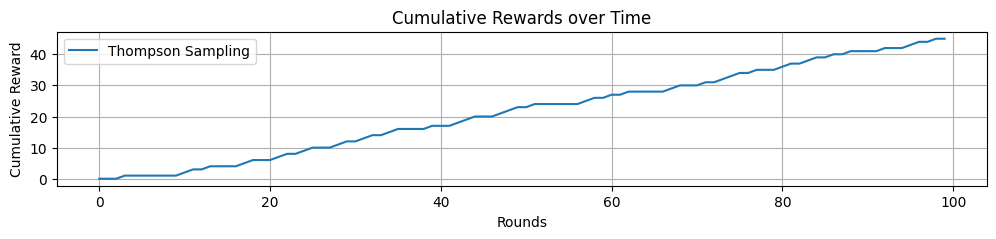

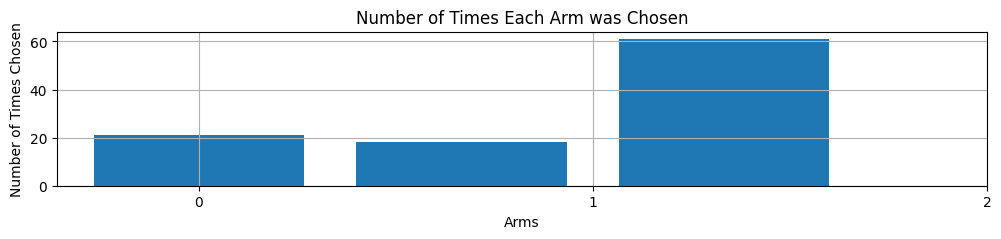

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the number of arms and their true probabilities
true_probs = [0.6, 0.3, 0.5]
n_arms = len(true_probs)
n_rounds = 100

# Initialize counts and rewards
alpha = np.ones(n_arms)
beta_param = np.ones(n_arms)
rewards = np.zeros(n_rounds)
chosen_arms = np.zeros(n_rounds)

# Thompson Sampling
for t in range(n_rounds):
    # Draw samples from the Beta distribution for each arm
    theta_samples = [np.random.beta(alpha[a], beta_param[a]) for a in range(n_arms)]

    # Select the arm with the highest sample
    chosen_arm = np.argmax(theta_samples)

    # Simulate pulling the chosen arm (Bernoulli trial)
    reward = np.random.rand() < true_probs[chosen_arm]

    # Update counts based on observed reward
    if reward:
        alpha[chosen_arm] += 1
    else:
        beta_param[chosen_arm] += 1

    # Store the reward and chosen arm
    rewards[t] = reward
    chosen_arms[t] = chosen_arm

# Plot the cumulative rewards
cumulative_rewards = np.cumsum(rewards)
plt.figure(figsize=(12, 2))
plt.plot(cumulative_rewards, label='Thompson Sampling')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of times each arm was chosen
plt.figure(figsize=(12, 2))
plt.hist(chosen_arms, bins=n_arms, align='left', rwidth=0.8)
plt.xlabel('Arms')
plt.ylabel('Number of Times Chosen')
plt.title('Number of Times Each Arm was Chosen')
plt.xticks(range(n_arms))
plt.grid(True)
plt.show()


**Regret Bounds for Thompson Sampling**

**Problem-dependent regret**: For all $(\epsilon > 0)$,

$[
\mathbb{E}_\mu[N_a(T)] \leq (1 + \epsilon) \frac{1}{\text{div}_{\text{KL}}(\mu, \mu^*)} \log(T) + o(\log(T)) \tag{65}
]$

This result holds:
- for Bernoulli bandits, with a uniform prior \[Kaufmann et al., 2012, Agrawal and Goyal, 2013\]
- for Gaussian bandits, with a Gaussian prior \[Agrawal and Goyal, 2017\]
- for exponential family bandits, with Jeffrey’s prior \[Korda et al., 2013\]

**Problem-independent regret**: \[Agrawal and Goyal, 2017\] For Bernoulli and Gaussian bandits, Thompson Sampling satisfies

$[
R_T \leq O\left(\sqrt{KT \log(T)}\right) \tag{66}
]$

**References:**
- Kaufmann et al., 2012
- Agrawal and Goyal, 2013
- Agrawal and Goyal, 2017
- Korda et al., 2013


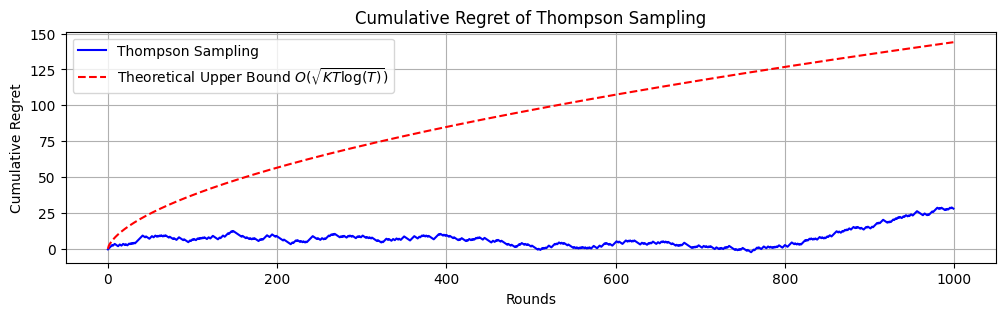

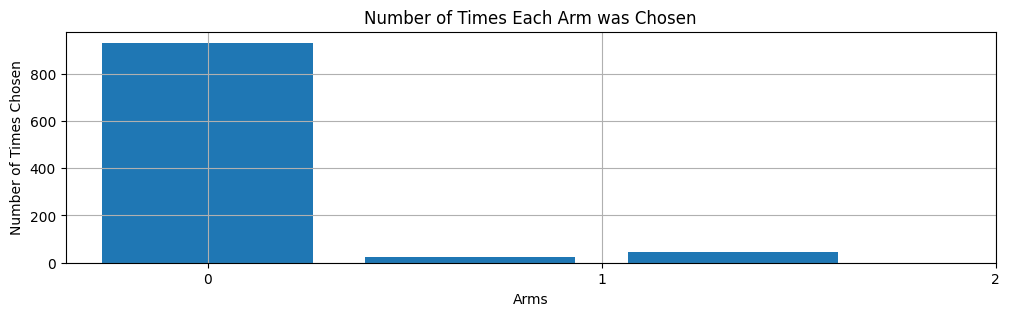

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the number of arms and their true probabilities
true_probs = [0.6, 0.3, 0.5]
n_arms = len(true_probs)
n_rounds = 1000

# Initialize counts and rewards
alpha = np.ones(n_arms)
beta_param = np.ones(n_arms)
rewards = np.zeros(n_rounds)
chosen_arms = np.zeros(n_rounds)

# Thompson Sampling
for t in range(n_rounds):
    # Draw samples from the Beta distribution for each arm
    theta_samples = [np.random.beta(alpha[a], beta_param[a]) for a in range(n_arms)]

    # Select the arm with the highest sample
    chosen_arm = np.argmax(theta_samples)

    # Simulate pulling the chosen arm (Bernoulli trial)
    reward = np.random.rand() < true_probs[chosen_arm]

    # Update counts based on observed reward
    if reward:
        alpha[chosen_arm] += 1
    else:
        beta_param[chosen_arm] += 1

    # Store the reward and chosen arm
    rewards[t] = reward
    chosen_arms[t] = chosen_arm

# Calculate cumulative rewards
cumulative_rewards = np.cumsum(rewards)

# Calculate regret
optimal_reward = np.max(true_probs) * np.arange(1, n_rounds + 1)
cumulative_regret = optimal_reward - cumulative_rewards

# Plot the cumulative regret
plt.figure(figsize=(12, 3))
plt.plot(cumulative_regret, label='Thompson Sampling', color='blue')
plt.plot(np.sqrt(n_arms * np.arange(1, n_rounds + 1) * np.log(np.arange(1, n_rounds + 1))),
         label='Theoretical Upper Bound $O(\\sqrt{KT \\log(T)})$', color='red', linestyle='dashed')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret of Thompson Sampling')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of times each arm was chosen
plt.figure(figsize=(12, 3))
plt.hist(chosen_arms, bins=n_arms, align='left', rwidth=0.8)
plt.xlabel('Arms')
plt.ylabel('Number of Times Chosen')
plt.title('Number of Times Each Arm was Chosen')
plt.xticks(range(n_arms))
plt.grid(True)
plt.show()
